# Time Series Forecasting

In [263]:
import warnings
warnings.filterwarnings("ignore")
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [264]:
# check the versions of key python libraries
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# numpy
import numpy
print('numpy: %s' % numpy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas
print('pandas: %s' % pandas.__version__)
# statsmodels
import statsmodels
print('statsmodels: %s' % statsmodels.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)

scipy: 1.9.1
numpy: 1.21.6
matplotlib: 3.5.2
pandas: 1.4.2
statsmodels: 0.13.2
sklearn: 1.0.2


## What is Time Series Forecasting?

A time series is a sequence of observations taken sequentially in time.

The current time is defined as t, an observation at the current time is defined as obs(t).
We are often interested in the observations made at prior times, called lag times or lags. Times in the past are negative relative to the current time. For example the previous time is t-1 and the time before that is t-2. The observations at these times are obs(t-1) and obs(t-2) respectively. Times in the future are what we are interested in forecasting and are positive relative to the current time. For example the next time is t+1 and the time after that is t+2. The observations at these times are obs(t+1) and obs(t+2) respectively.
For simplicity, we often drop the obs(t) notation and use t+1 instead and assume we are talking about observations at times rather than the time indexes themselves. Additionally, we can refer to an observation at a lag by shorthand such as a lag of 10 or lag=10 which would be the same as t-10. To summarize:
- t-n: A prior or lag time (e.g. t-1 for the previous time).
- t: A current time and point of reference.
- t+n: A future or forecast time (e.g. t+1 for the next time).

Making predictions about the future is called extrapolation in the classical statistical handling of time series data.

## Components of Time Series
Time series analysis provides a body of techniques to better understand a dataset. Perhaps the most useful of these is the decomposition of a time series into 4 constituent parts:
- Level. The baseline value for the series if it were a straight line.
- Trend. The optional and often linear increasing or decreasing behavior of the series over
time.
- Seasonality. The optional repeating patterns or cycles of behavior over time.
- Noise. The optional variability in the observations that cannot be explained by the model.

## Concerns of Forecasting
When forecasting, it is important to understand your goal. Use the Socratic method and ask lots of questions to help zoom in on the specifics of your predictive modeling problem. For example:
1. **How much data do you have available and are you able to gather it all together?** More data is often more helpful, offering greater opportunity for exploratory data analysis, model testing and tuning, and model fidelity.

2. **What is the time horizon of predictions that is required?**

    - Short
    - medium
    - long term

Shorter time horizons are often easier to predict with higher confidence.

3. **Can forecasts be updated frequently over time or must they be made once and remain static?** Updating forecasts as new information becomes available often results in more accurate predictions.

4. **At what temporal frequency are forecasts required?** Often forecasts can be made at a lower or higher frequencies, allowing you to harness down-sampling, and up-sampling of data, which in turn can offer benefits while modeling.

Time series data often requires cleaning, scaling, and even transformation. For example:

- **Frequency.** Perhaps data is provided at a frequency that is too high to model or is unevenly spaced through time requiring resampling for use in some models.
- **Outliers.** Perhaps there are corrupt or extreme outlier values that need to be identified and handled.
- **Missing.** Perhaps there are gaps or missing data that need to be interpolated or imputed.


# Supervised learning vs Regression

- Classification: A classification problem is when the output variable is a category, such as red and blue or disease and no disease.
- Regression: A regression problem is when the output variable is a real value, such as dollars or weight. The contrived example above is a regression problem.- Classification: A classification problem is when the output variable is a category, such as red and blue or disease and no disease.
- Regression: A regression problem is when the output variable is a real value, such as dollars or weight. The contrived example above is a regression problem.

##  Sliding Window With Multivariates
The number of observations recorded for a given time in a time series dataset matters. Tradi- tionally, different names are used:
-  **Univariate Time Series:** These are datasets where only a single variable is observed at each time, such as temperature each hour. The example in the previous section is a univariate time series dataset.
-  **Multivariate Time Series:** These are datasets where two or more variables are observed at each time.


## Sliding Window With Multiple Steps
The number of time steps ahead to be forecasted is important. Again, it is traditional to use different names for the problem depending on the number of time-steps to forecast:
- **One-step Forecast:** This is where the next time step (t+1) is predicted.
- **Multi-step Forecast:** This is where two or more future time steps are to be predicted.

# Data Preparation

## Load Time Series Data
Pandas represented time series datasets as a Series. A Series1 is a one-dimensional array with a time label for each row. The main function for loading CSV data in Pandas is the read csv() function2. We can use this to load the time series as a Series object, instead of a DataFrame, as follows:

In [265]:
# load dataset using read_csv()
from pandas import read_csv
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True,squeeze=True)
print(type(series))
print(series.head())

<class 'pandas.core.series.Series'>
Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
Name: Births, dtype: int64


In [266]:
series

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
              ..
1959-12-27    37
1959-12-28    52
1959-12-29    48
1959-12-30    55
1959-12-31    50
Name: Births, Length: 365, dtype: int64

In [267]:
# Number of Observation
print(series.size)

365


In [268]:
# Querying By Time
series['1959-01']

Date
1959-01-01    35
1959-01-02    32
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
1959-01-08    43
1959-01-09    38
1959-01-10    27
1959-01-11    38
1959-01-12    33
1959-01-13    55
1959-01-14    47
1959-01-15    45
1959-01-16    37
1959-01-17    50
1959-01-18    43
1959-01-19    41
1959-01-20    52
1959-01-21    34
1959-01-22    53
1959-01-23    39
1959-01-24    32
1959-01-25    37
1959-01-26    43
1959-01-27    39
1959-01-28    35
1959-01-29    44
1959-01-30    38
1959-01-31    24
Name: Births, dtype: int64

In [269]:
# Descriptive Statistics
print(series.describe())

count    365.000000
mean      41.980822
std        7.348257
min       23.000000
25%       37.000000
50%       42.000000
75%       46.000000
max       73.000000
Name: Births, dtype: float64


# Graph our data

<AxesSubplot:xlabel='Date'>

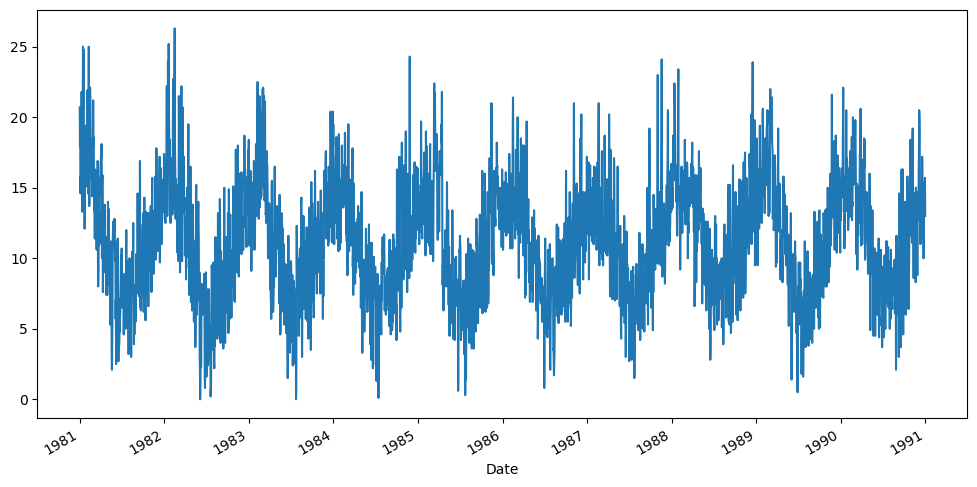

In [270]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot()

pyplot.show()

## Feature Engineering

- Date Time Features: these are components of the time step itself for each observation.
- Lag Features: these are values at prior time steps.
- Window Features: these are a summary of values over a fixed window of prior time steps.


In [271]:
# create date time features of a dataset
from pandas import read_csv
from pandas import DataFrame
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
print(series.head(5))

dataframe = DataFrame()

dataframe['month'] = [series.index[i].month for i in range(len(series))] 
dataframe['day'] = [series.index[i].day for i in range(len(series))] 
dataframe['temperature'] = [series[i] for i in range(len(series))] 
print(dataframe.head(5))

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64
   month  day  temperature
0      1    1         20.7
1      1    2         17.9
2      1    3         18.8
3      1    4         14.6
4      1    5         15.8


You may enumerate all the properties of a time-stamp and consider what might be useful for your problem, such as:
-  Minutes elapsed for the day. 
- Hour of day.
- Business hours or not.
- Weekend or not.
- Season of the year.
- Business quarter of the year. 􏰀 Daylight savings or not.
- Public holiday or not.
- Leap year or not.


## Lag Features
Lag features are the classical way that time series forecasting problems are transformed into supervised learning problems.

The Pandas library provides the shift() function1 to help create these shifted or lag features from a time series dataset. Shifting the dataset by 1 creates the t column, adding a NaN
(unknown) value for the first row. The time series dataset without a shift represents the t+1. Let’s make this concrete with an example.

In [272]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
dataframe = concat([temps.shift(-3) ,temps.shift(-1) , temps , temps.shift(1) , temps.shift(3 )], axis=1) 
dataframe.columns = ['t-3' ,'t-1', 't', 't+1' , 't+3'] 
print(dataframe.head(10))

    t-3   t-1     t   t+1   t+3
0  14.6  17.9  20.7   NaN   NaN
1  15.8  18.8  17.9  20.7   NaN
2  15.8  14.6  18.8  17.9   NaN
3  15.8  15.8  14.6  18.8  20.7
4  17.4  15.8  15.8  14.6  17.9
5  21.8  15.8  15.8  15.8  18.8
6  20.0  17.4  15.8  15.8  14.6
7  16.2  21.8  17.4  15.8  15.8
8  13.3  20.0  21.8  17.4  15.8
9  16.7  16.2  20.0  21.8  15.8


A difficulty with the sliding window approach is how large to make the window for your problem. Perhaps a good starting point is to perform a sensitivity analysis and try a suite of different window widths to in turn create a suite of different views of your dataset and see which results in better performing models. There will be a point of diminishing returns.


Additionally, why stop with a linear window? Perhaps you need a lag value from last week, last month, and last year. Again, this comes down to the specific domain. In the case of the temperature dataset, a lag value from the same day in the previous year or previous few years may be useful. We can do more with a window than include the raw values. 

## Rolling Window Statistics
A step beyond adding raw lagged values is to add a summary of the values at previous time steps. We can calculate summary statistics across the values in the sliding window and include these as features in our dataset. Perhaps the most useful is the mean of the previous few values, also called the rolling mean.

First, the series must be shifted. Then the rolling dataset can be created and the mean values calculated on each window of two values. 

In [273]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
import numpy as np
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
shifted = temps.shift(1)
window = shifted.rolling(window=2)
means = window.mean()
dataframe = concat([means, temps], axis=1) 
dataframe.columns = ['mean(t-1,t)', 't+1'] 
print(dataframe.head(5))


   mean(t-1,t)   t+1
0          NaN  20.7
1          NaN  17.9
2        19.30  18.8
3        18.35  14.6
4        16.70  15.8


In [274]:
np.mean([20.7 , 17.9]) , np.mean([ 17.9 , 18.8]) , np.mean([18.8 , 14.6])

(19.299999999999997, 18.35, 16.7)

- The first NaN was created by the shift of the series.
- The second because NaN cannot be used to calculate a mean value.
- Finally, the third row shows the expected value of 19.30 (the mean of 20.7 and 17.9) used to predict the 3rd value in the series of 18.8


There are more statistics we can calculate and even different mathematical ways of calculating the definition of the window. Below is another example that shows a window width of 3 and a dataset comprised of more summary statistics, specifically the minimum, mean, and maximum value in the window.

In [275]:
# create rolling statistics features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
width = 3
shifted = temps.shift(width - 1)
window = shifted.rolling(window=width)
dataframe = concat([window.min(), window.mean(), window.max(), temps], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0   NaN        NaN   NaN  20.7
1   NaN        NaN   NaN  17.9
2   NaN        NaN   NaN  18.8
3   NaN        NaN   NaN  14.6
4  17.9  19.133333  20.7  15.8


In [276]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


In [277]:
# create expanding window features
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
temps = DataFrame(series.values)
window = temps.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))


    min       mean   max   t+1
0  20.7  20.700000  20.7  17.9
1  17.9  19.300000  20.7  18.8
2  17.9  19.133333  20.7  14.6
3  14.6  18.000000  20.7  15.8
4  14.6  17.560000  20.7  15.8


In [278]:
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
window = series.expanding()
dataframe = concat([window.min(), window.mean(), window.max(), temps.shift(-1)], axis=1)
dataframe.columns = ['min', 'mean', 'max', 't+1']
print(dataframe.head(5))

                      min       mean   max  t+1
1981-01-01 00:00:00  20.7  20.700000  20.7  NaN
1981-01-02 00:00:00  17.9  19.300000  20.7  NaN
1981-01-03 00:00:00  17.9  19.133333  20.7  NaN
1981-01-04 00:00:00  14.6  18.000000  20.7  NaN
1981-01-05 00:00:00  14.6  17.560000  20.7  NaN


## Data Visualization
1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.


<AxesSubplot:xlabel='Date'>

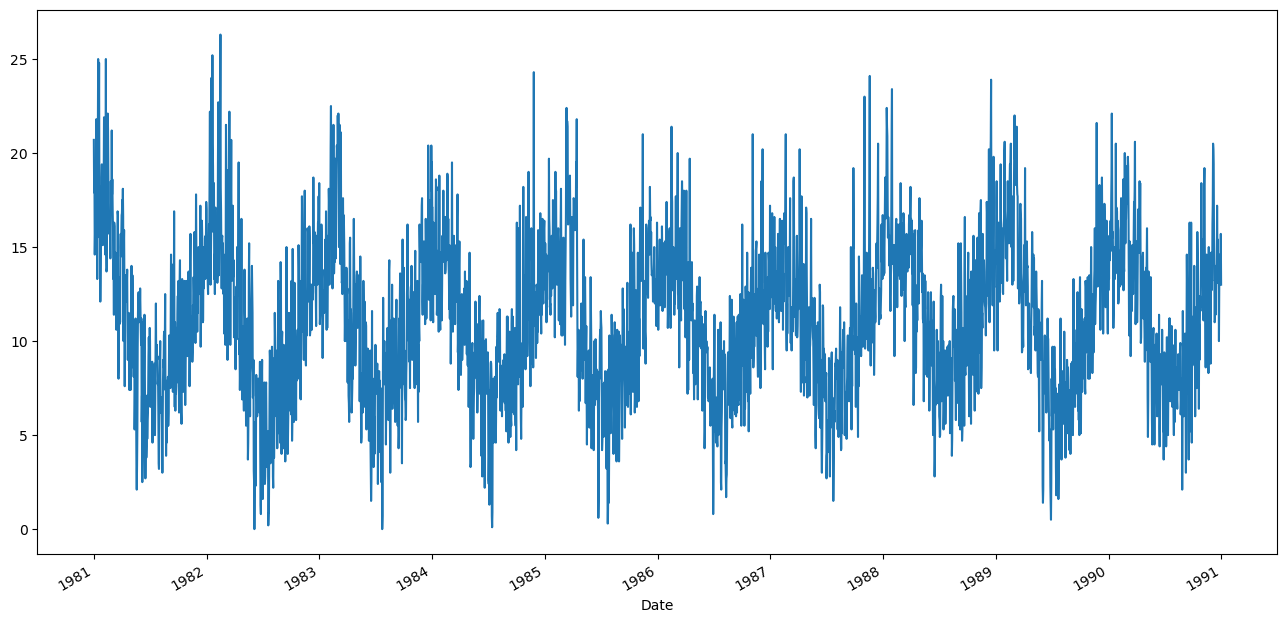

In [279]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
series.plot()
pyplot.show()

The line plot is quite dense. Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots. Below is an example of changing the style of the line to be black dots instead of a connected line (the style=’k.’ argument). We could change this example to use a dashed line by setting style to be ’k--’.


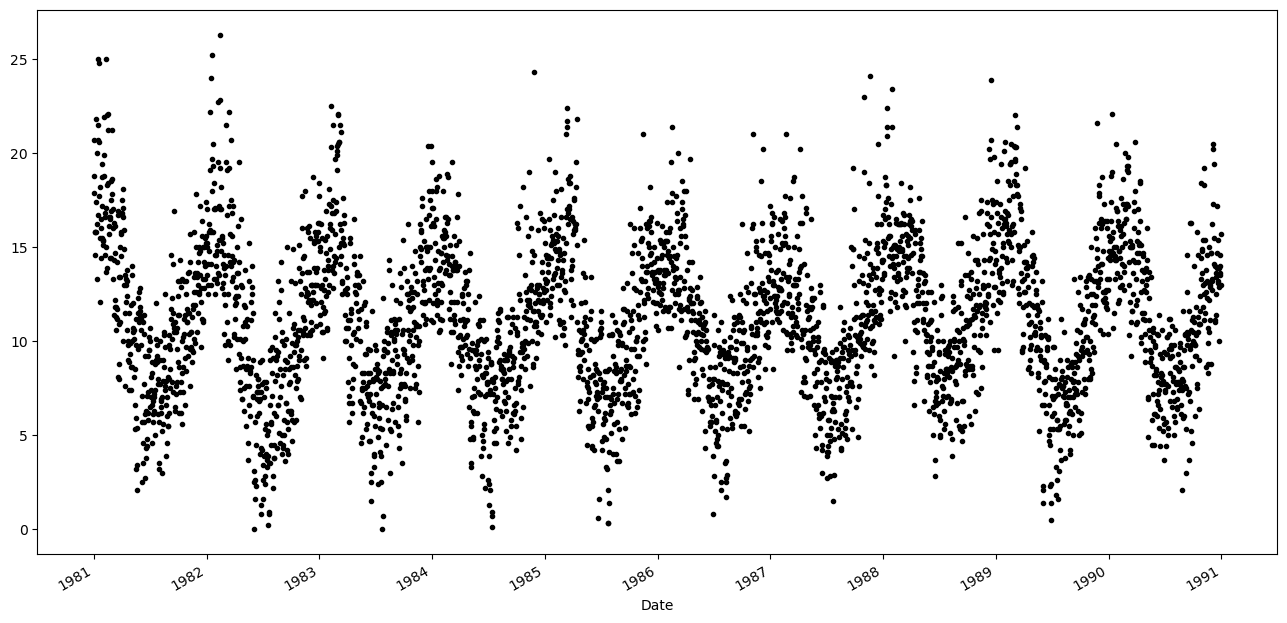

In [280]:
# create a dot plot
from pandas import read_csv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,8)
series = read_csv('./data/daily-minimum-temperatures.csv', 
                  header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(style='k.')
plt.show();

It can be helpful to compare line plots for the same interval, such as from day-to-day, month-to-month, and year-to-year. The Minimum Daily Temperatures dataset spans 10 years. We can group data by year and create a line plot for each year for direct compari- son. The example below shows how to do this. First the observations are grouped by year
(series.groupby(Grouper(freq=’A’))).

The groups are then enumerated and the observations for each year are stored as columns
in a new DataFrame. Finally, a plot of this contrived DataFrame is created with each column visualized as a subplot with legends removed to cut back on the clutter.

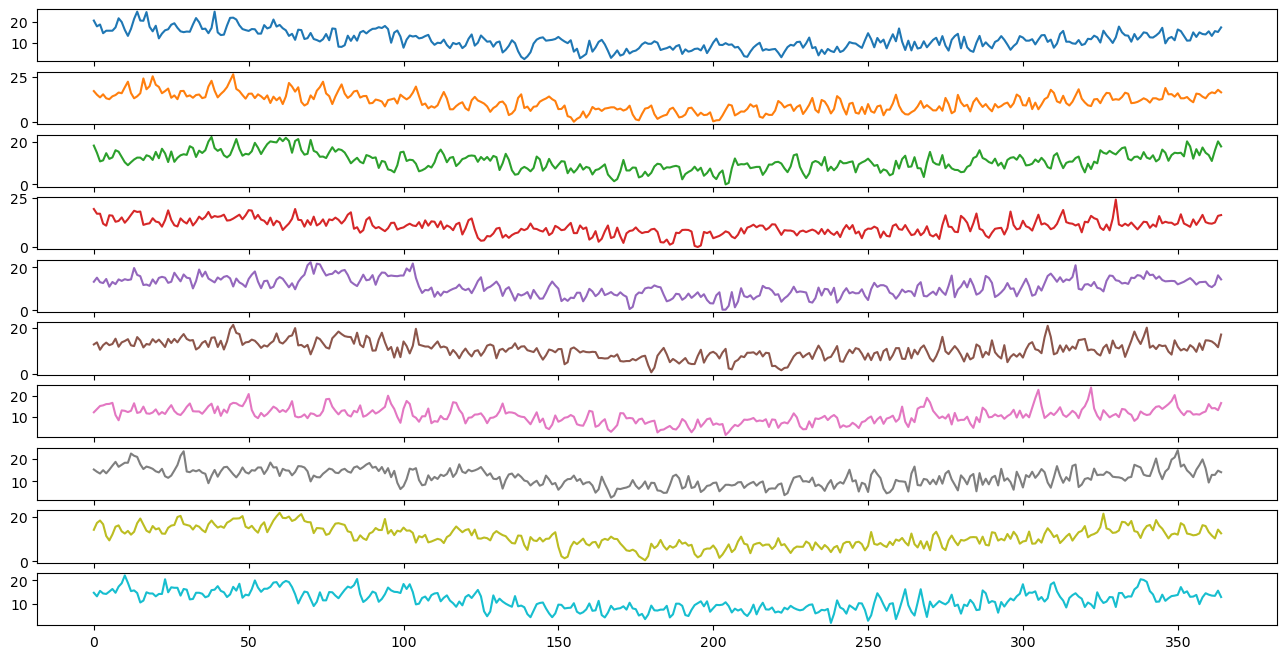

In [281]:
# create stacked line plots

from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
plt.rcParams["figure.figsize"] = (16,8)


for name, group in groups:
	years[name.year] = group.values
years.plot(subplots=True, legend=False)
plt.show();


**Running the example creates 10 line plots, one for each year from 1981 at the top and 1990 at the bottom, where each line plot is 365 days in length.**

## Histogram and Density Plots
Another important visualization is of the distribution of observations themselves. This means a plot of the values without the temporal ordering. Some linear time series forecasting methods assume a well-behaved distribution of observations (i.e. a bell curve or normal distribution). This can be explicitly checked using tools like statistical hypothesis tests. But plots can provide a useful first check of the distribution of observations both on raw observations and after any type of data transform has been performed.

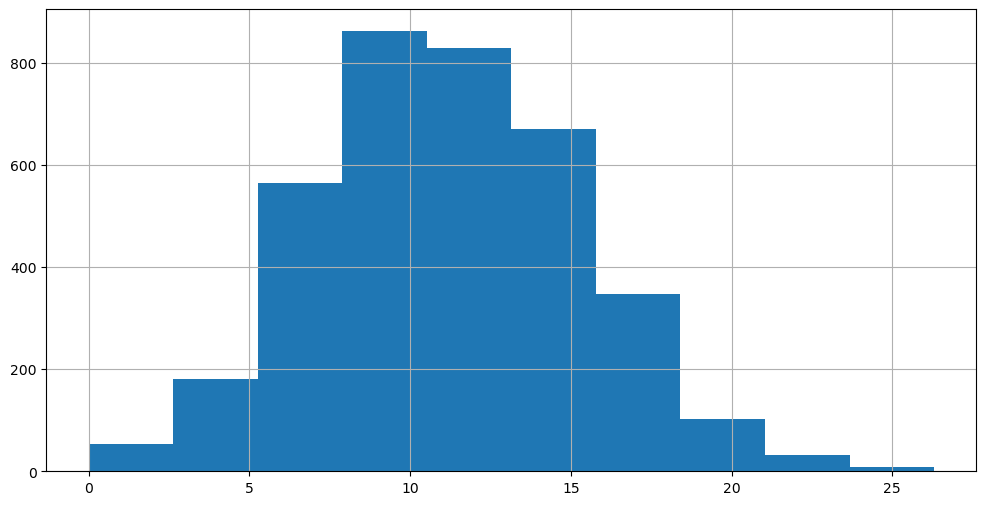

In [282]:
# create a histogram plot
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()

plt.rcParams["figure.figsize"] = (12,6)

series.hist()
plt.show();

We can get a better idea of the shape of the distribution of observations by using a density plot. This is like the histogram, except a function is used to fit the distribution of observations and a nice, smooth line is used to summarize this distribution. Below is an example of a density plot of the Minimum Daily Temperatures dataset.


Running the example creates a plot that provides a clearer summary of the distribution of observations. We can see that perhaps the distribution is a little asymmetrical and perhaps a little pointy to be Gaussian. Seeing a distribution like this may suggest later exploring statistical hypothesis tests to formally check if the distribution is Gaussian and perhaps data preparation techniques to reshape the distribution, like the Box-Cox transform.

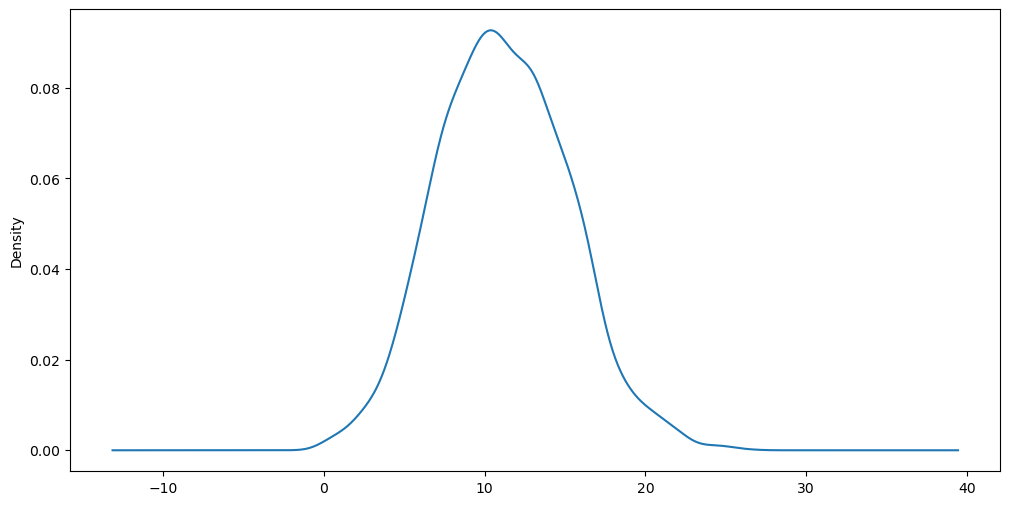

In [283]:
series.plot(kind='kde')
plt.show();

## Box and Whisker Plots by Interval
Histograms and density plots provide insight into the distribution of all observations, but we may be interested in the distribution of values by time interval. Another type of plot that is useful to summarize the distribution of observations is the box and whisker plot. This plot draws a box around the 25th and 75th percentiles of the data that captures the middle 50% of observations. A line is drawn at the 50th percentile (the median) and whiskers are drawn above and below the box to summarize the general extents of the observations. Dots are drawn for outliers outside the whiskers or extents of the data.

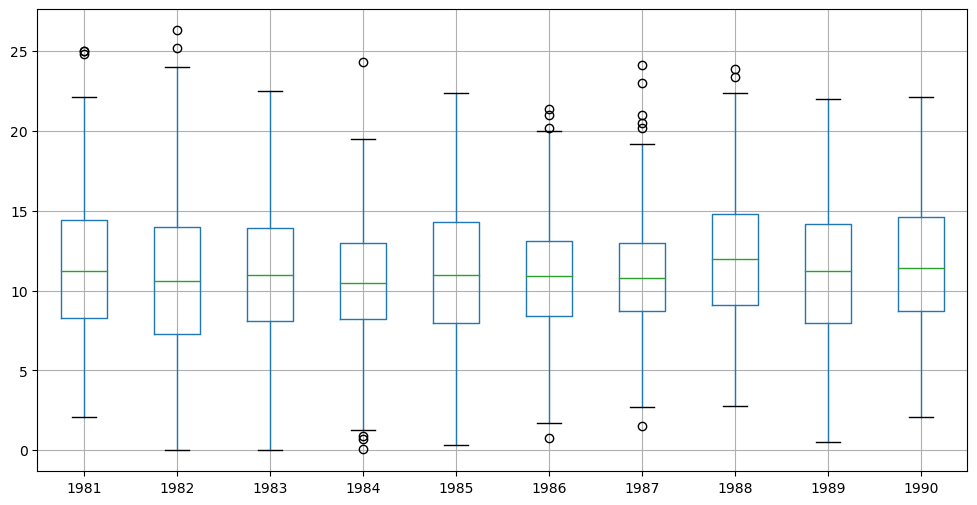

In [284]:
# create a boxplot of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
import matplotlib.pyplot as plt

series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
plt.rcParams["figure.figsize"] = (12,6)

years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show();

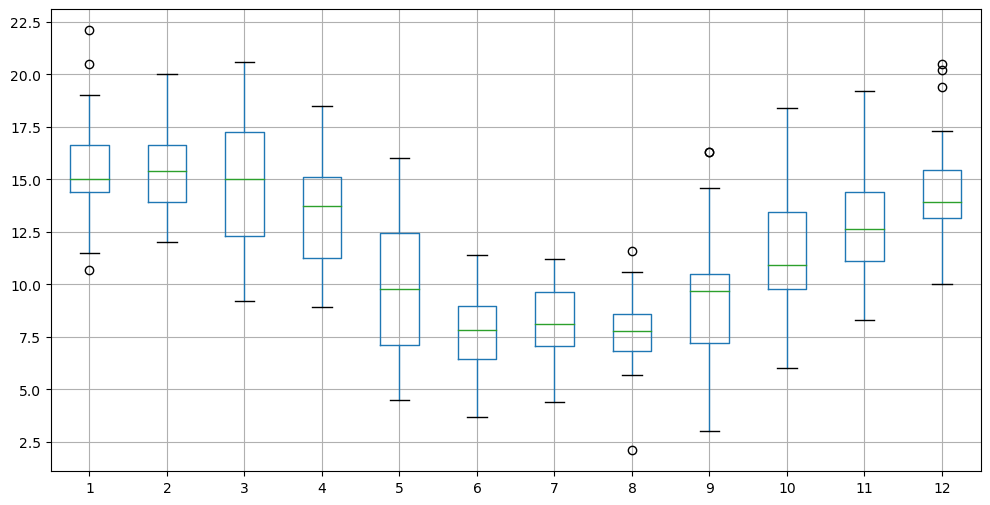

In [285]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1) 
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
plt.show();

## Heat Maps
A matrix of numbers can be plotted as a surface, where the values in each cell of the matrix are assigned a unique color. This is called a heatmap, as larger values can be drawn with warmer colors (yellows and reds) and smaller values can be drawn with cooler colors (blues and greens). Like the box and whisker plots, we can compare observations between intervals using a heat map.
In the case of the Minimum Daily Temperatures, the observations can be arranged into a matrix of year-columns and day-rows, with minimum temperature in the cell for each day. A heat map of this matrix can then be plotted. Below is an example of creating a heatmap of the Minimum Daily Temperatures data. The matshow() function from the Matplotlib library is used as no heatmap support is provided directly in Pandas.

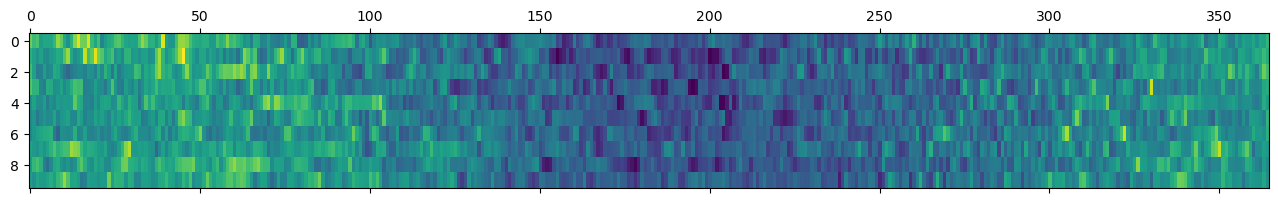

In [286]:
# create a heat map of yearly data
from pandas import read_csv
from pandas import DataFrame
from pandas import Grouper
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show();

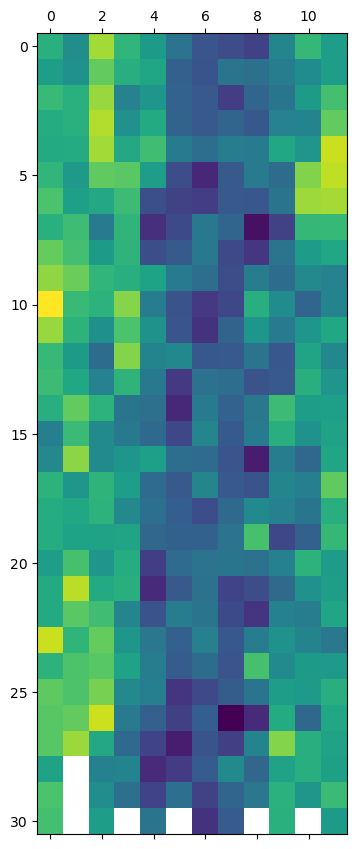

In [287]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show();

## Lag Scatter Plots

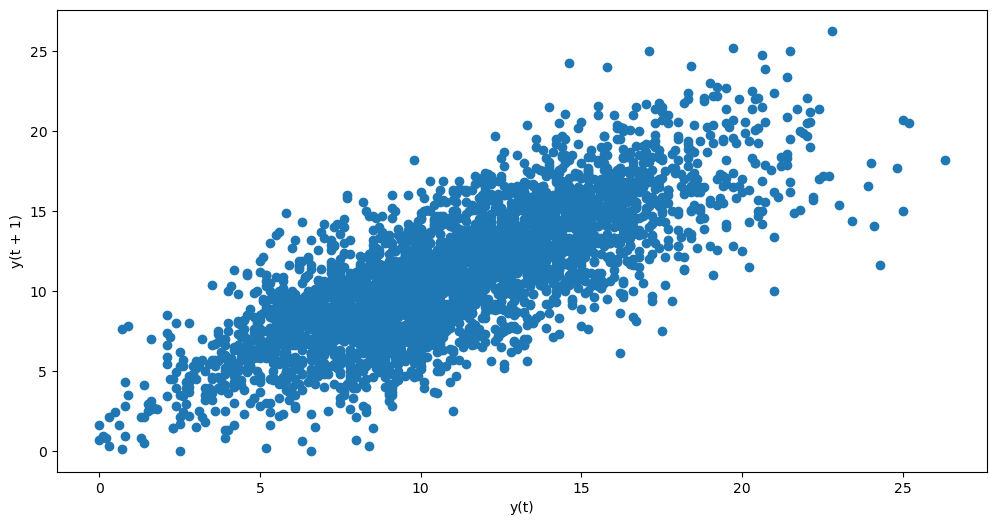

In [288]:
from pandas.plotting import lag_plot
# create a scatter plot
from pandas import read_csv
from pandas.plotting import lag_plot
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
lag_plot(series)
plt.show();

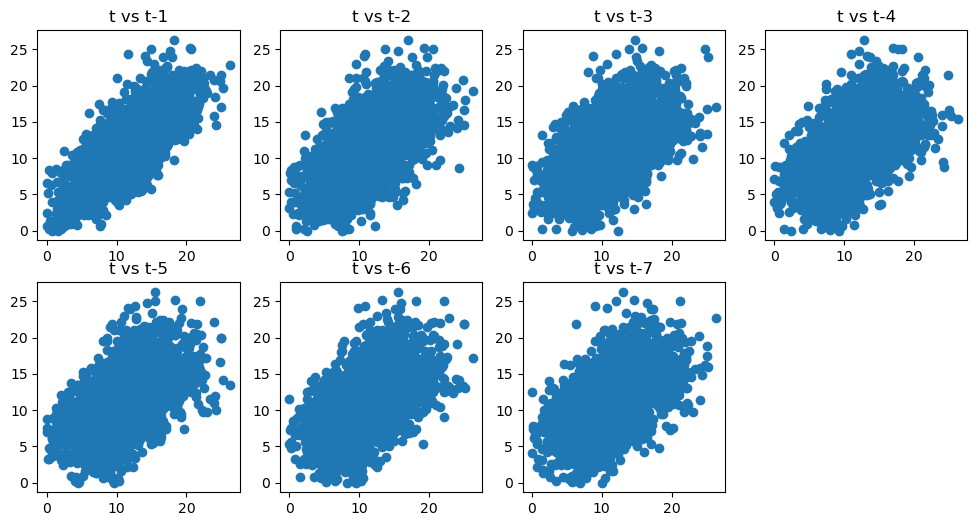

In [289]:
series = read_csv('./data/daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t vs t-' + str(i))
	plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)

plt.show();

## Autocorrelation
We can quantify the strength and type of relationship between observations and their lags. In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation). A correlation value calculated between two groups of numbers, such as observations and their lag=1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.


Correlation values, called correlation coefficients, can be calculated for each observation and different lag values. 
Once calculated, a plot can be created to help better understand how this relationship changes over the lag. 

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation plot() function.

The resulting plot shows lag along the x-axis and the correlation on the y-axis. Dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful). 

We can see that for the Minimum Daily Temperatures dataset we see cycles of strong negative and positive correlation. This captures the relationship of an observation with past observations in the same and opposite seasons or times of year. Sine waves like those seen

in this example are a strong sign of seasonality in the dataset.

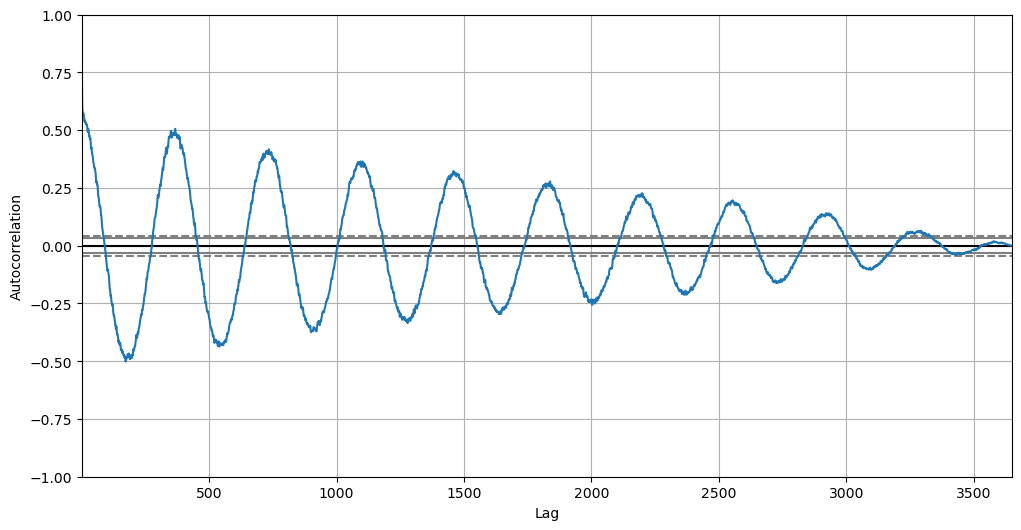

In [290]:
# create an autocorrelation plot
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
series = read_csv('./data/daily-minimum-temperatures.csv', 
                  header=0, index_col=0, parse_dates=True, squeeze=True)
autocorrelation_plot(series)
plt.show();

# Resampling and Interpolation



Resampling involves changing the frequency of your time series observations. Two types of resampling are:
- Upsampling: Where you increase the frequency of the samples, such as from minutes to seconds.
- Downsampling: Where you decrease the frequency of the samples, such as from days to months.

 In the case of upsampling, care may be needed in determining how the fine-grained observations are calculated using interpolation. In the case of downsampling, care may be needed in selecting the summary statistics used to calculate the new aggregated values.
 
There are perhaps two main reasons why you may be interested in resampling your time series data:

- **Problem Framing:** Resampling may be required if your data is not available at the
same frequency that you want to make predictions.
- **Feature Engineering:** Resampling can also be used to provide additional structure or insight into the learning problem for supervised learning models.

## Upsampleing

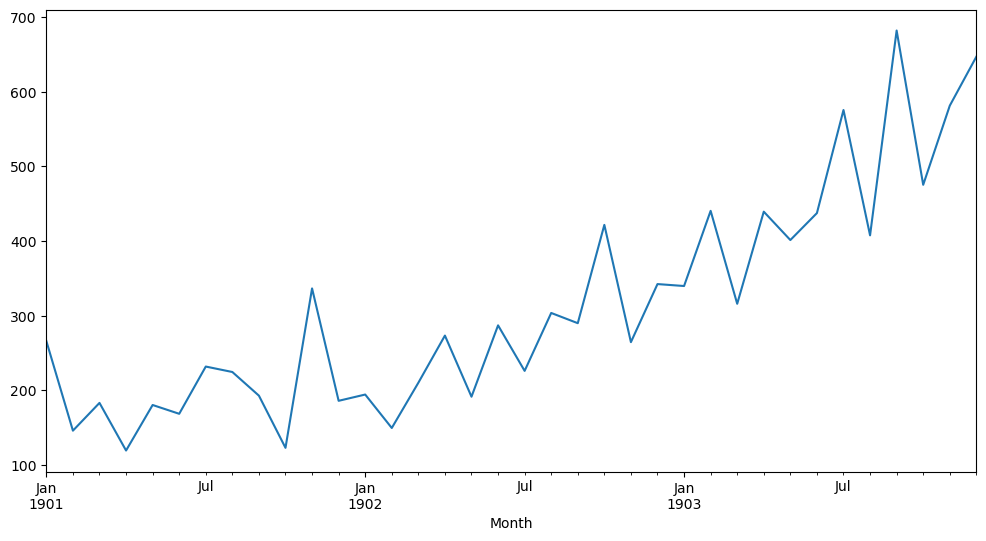

In [291]:
# upsample to daily intervals
from pandas import read_csv
from pandas import datetime

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('./data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.plot();

Month
1901-01-01    266.0
1901-01-02      NaN
1901-01-03      NaN
1901-01-04      NaN
1901-01-05      NaN
1901-01-06      NaN
1901-01-07      NaN
1901-01-08      NaN
1901-01-09      NaN
1901-01-10      NaN
1901-01-11      NaN
1901-01-12      NaN
1901-01-13      NaN
1901-01-14      NaN
1901-01-15      NaN
1901-01-16      NaN
1901-01-17      NaN
1901-01-18      NaN
1901-01-19      NaN
1901-01-20      NaN
1901-01-21      NaN
1901-01-22      NaN
1901-01-23      NaN
1901-01-24      NaN
1901-01-25      NaN
1901-01-26      NaN
1901-01-27      NaN
1901-01-28      NaN
1901-01-29      NaN
1901-01-30      NaN
1901-01-31      NaN
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


<AxesSubplot:xlabel='Month'>

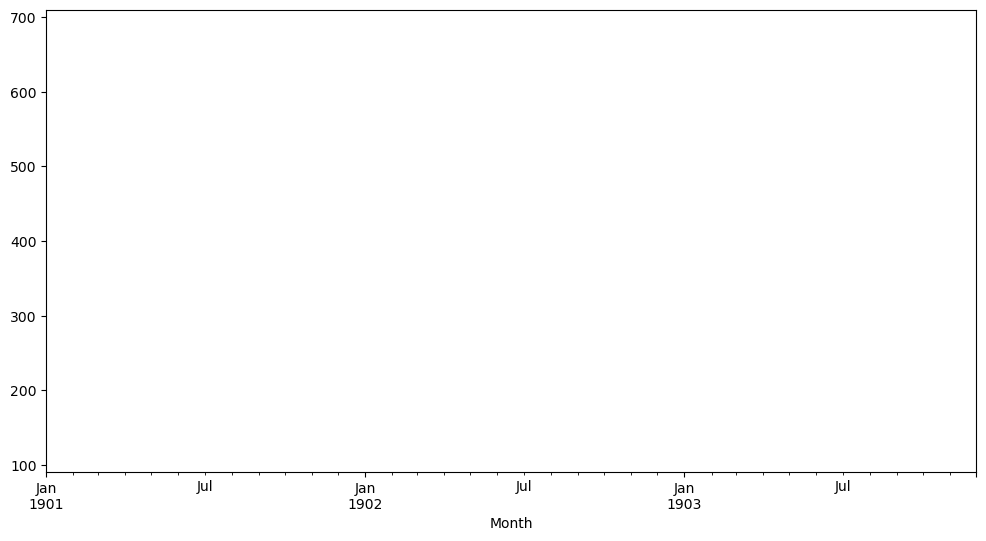

In [292]:
upsampled = series.resample('D').mean()
print(upsampled.head(32))
upsampled.plot()

We can see that the resample() function has created the rows by putting NaN values in the new values. We can see we still have the sales volume on the first of January and February from the original data. Next, we can interpolate the missing values at this new frequency. The Series Pandas object provides an interpolate() function to interpolate missing values, and there is a nice selection of simple and more complex interpolation functions. You may have domain knowledge to help choose how values are to be interpolated. A good starting point is to use a linear interpolation. This draws a straight line between available data, in this case on the first of the month, and fills in values at the chosen frequency from this line.


Month
1901-01-01    266.000000
1901-01-02    258.630160
1901-01-03    251.560886
1901-01-04    244.720748
1901-01-05    238.109746
1901-01-06    231.727880
1901-01-07    225.575149
1901-01-08    219.651553
1901-01-09    213.957094
1901-01-10    208.491770
1901-01-11    203.255582
1901-01-12    198.248529
1901-01-13    193.470612
1901-01-14    188.921831
1901-01-15    184.602185
1901-01-16    180.511676
1901-01-17    176.650301
1901-01-18    173.018063
1901-01-19    169.614960
1901-01-20    166.440993
1901-01-21    163.496161
1901-01-22    160.780465
1901-01-23    158.293905
1901-01-24    156.036481
1901-01-25    154.008192
1901-01-26    152.209039
1901-01-27    150.639021
1901-01-28    149.298139
1901-01-29    148.186393
1901-01-30    147.303783
1901-01-31    146.650308
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


<AxesSubplot:xlabel='Month'>

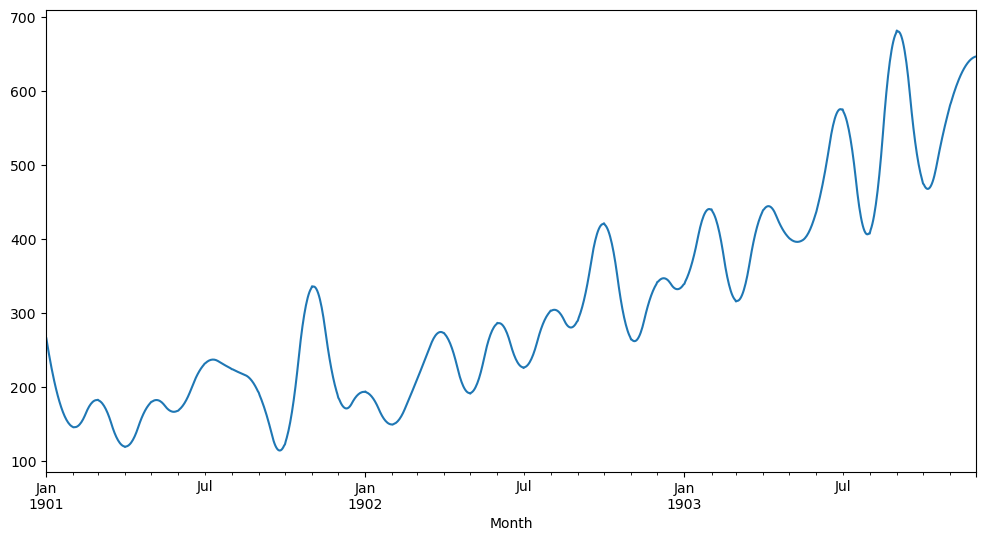

In [293]:
interpolated = upsampled.interpolate(method='spline', order=2)
print(interpolated.head(32))
interpolated.plot()
plt.show()

Another common interpolation method is to use a polynomial or a spline to connect the values. This creates more curves and can look more natural on many datasets. Using a spline interpolation requires you specify the order (number of terms in the polynomial); in this case, an order of 2 is just fine.

Month
1901-01-01    266.000000
1901-01-02    239.623770
1901-01-03    215.993227
1901-01-04    194.938104
1901-01-05    176.299463
1901-01-06    159.923943
1901-01-07    145.663667
1901-01-08    133.376163
1901-01-09    122.924266
1901-01-10    114.176033
1901-01-11    107.004660
1901-01-12    101.288383
1901-01-13     96.910401
1901-01-14     93.758778
1901-01-15     91.726361
1901-01-16     90.710689
1901-01-17     90.613906
1901-01-18     91.342671
1901-01-19     92.808071
1901-01-20     94.925531
1901-01-21     97.614728
1901-01-22    100.799502
1901-01-23    104.407764
1901-01-24    108.371415
1901-01-25    112.626251
1901-01-26    117.111876
1901-01-27    121.771618
1901-01-28    126.552434
1901-01-29    131.404826
1901-01-30    136.282753
1901-01-31    141.143541
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


<AxesSubplot:xlabel='Month'>

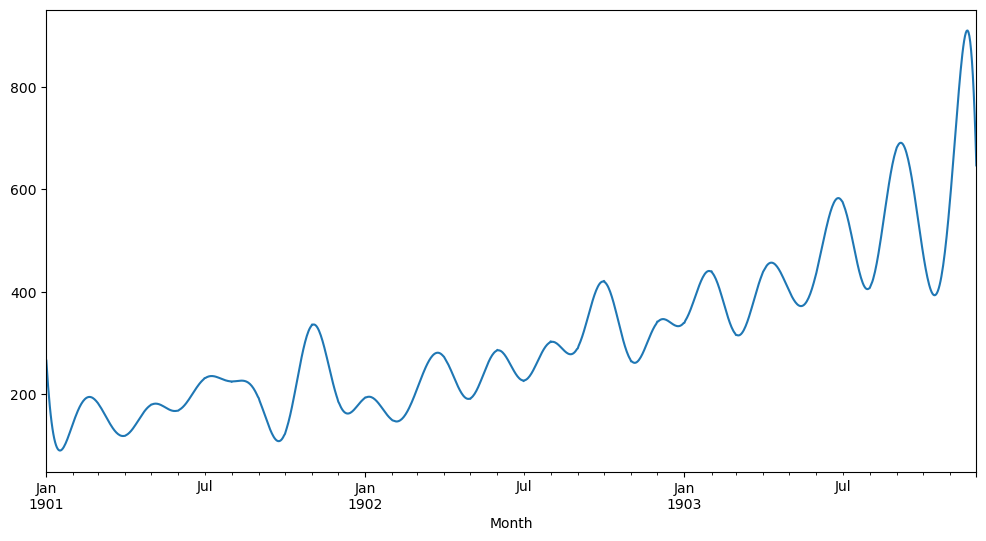

In [294]:
interpolated_spline = upsampled.interpolate(method='spline', order=5)
print(interpolated_spline.head(32))
interpolated_spline.plot()
plt.show()

Month
1901-01-01    266.000000
1901-01-02    254.716321
1901-01-03    244.085408
1901-01-04    234.090834
1901-01-05    224.716170
1901-01-06    215.944990
1901-01-07    207.760865
1901-01-08    200.147368
1901-01-09    193.088072
1901-01-10    186.566548
1901-01-11    180.566369
1901-01-12    175.071108
1901-01-13    170.064337
1901-01-14    165.529627
1901-01-15    161.450553
1901-01-16    157.810685
1901-01-17    154.593596
1901-01-18    151.782859
1901-01-19    149.362047
1901-01-20    147.314730
1901-01-21    145.624483
1901-01-22    144.274876
1901-01-23    143.249484
1901-01-24    142.531877
1901-01-25    142.105628
1901-01-26    141.954310
1901-01-27    142.061495
1901-01-28    142.410756
1901-01-29    142.985664
1901-01-30    143.769793
1901-01-31    144.746714
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


<AxesSubplot:xlabel='Month'>

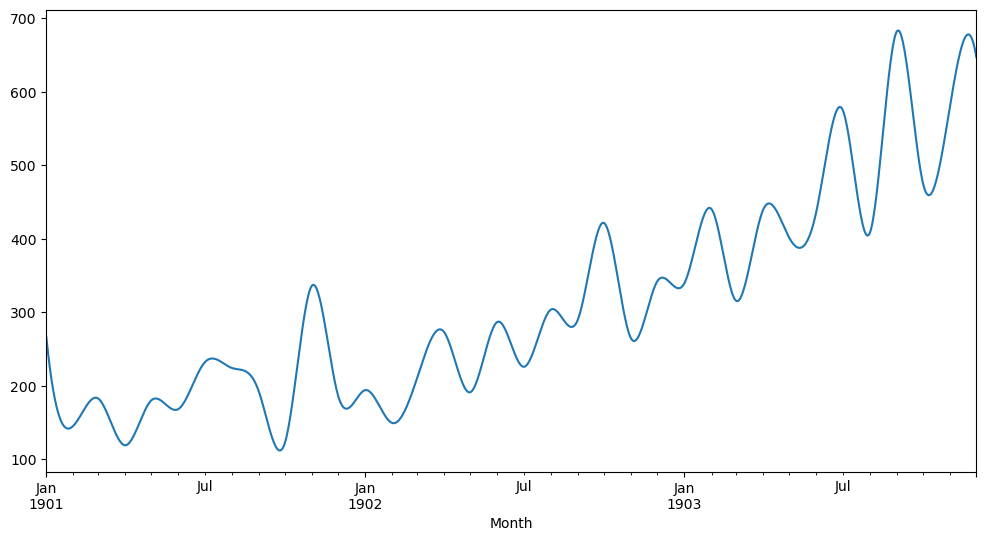

In [295]:

interpolated_cubic = upsampled.interpolate(method='cubic', order=5)
print(interpolated_cubic.head(32))
interpolated_cubic.plot()
plt.show()

Month
1901-01-01    266.000000
1901-01-02    258.653962
1901-01-03    251.539381
1901-01-04    244.656256
1901-01-05    238.004587
1901-01-06    231.584374
1901-01-07    225.395618
1901-01-08    219.438318
1901-01-09    213.712474
1901-01-10    208.218086
1901-01-11    202.955155
1901-01-12    197.923680
1901-01-13    193.123662
1901-01-14    188.555099
1901-01-15    184.217993
1901-01-16    180.112343
1901-01-17    176.238150
1901-01-18    172.595412
1901-01-19    169.184131
1901-01-20    166.004307
1901-01-21    163.055938
1901-01-22    160.339026
1901-01-23    157.853570
1901-01-24    155.599571
1901-01-25    153.577027
1901-01-26    151.785940
1901-01-27    150.226310
1901-01-28    148.898135
1901-01-29    147.801417
1901-01-30    146.936155
1901-01-31    146.302349
1901-02-01    145.900000
Freq: D, Name: Sales, dtype: float64


<AxesSubplot:xlabel='Month'>

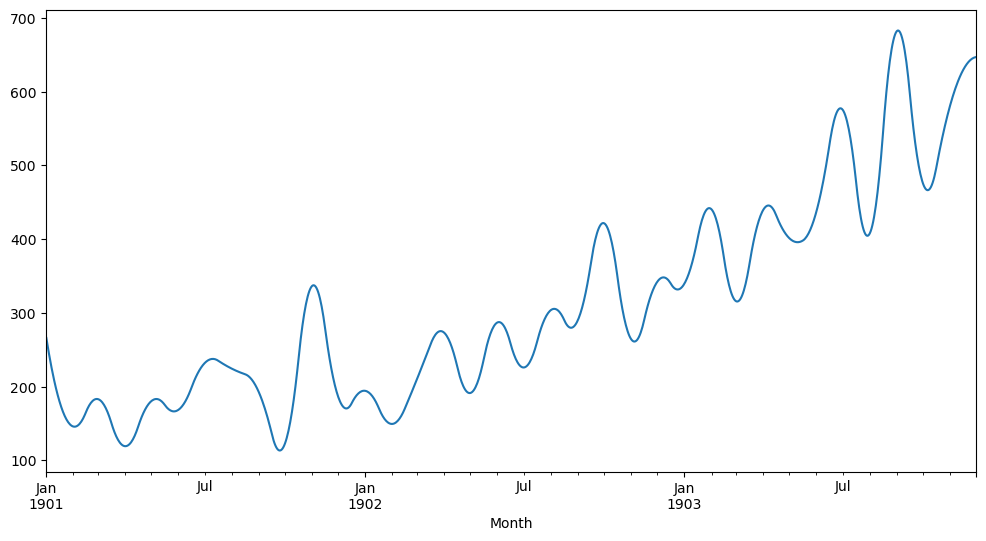

In [296]:

interpolated_quadratic = upsampled.interpolate(method='quadratic', order=5)
print(interpolated_quadratic.head(32))
interpolated_quadratic.plot()
plt.show()

Month
1901-01-01    266.0
1901-01-02    266.0
1901-01-03    266.0
1901-01-04    266.0
1901-01-05    266.0
1901-01-06    266.0
1901-01-07    266.0
1901-01-08    266.0
1901-01-09    266.0
1901-01-10    266.0
1901-01-11    266.0
1901-01-12    266.0
1901-01-13    266.0
1901-01-14    266.0
1901-01-15    266.0
1901-01-16    266.0
1901-01-17    266.0
1901-01-18    266.0
1901-01-19    266.0
1901-01-20    266.0
1901-01-21    266.0
1901-01-22    266.0
1901-01-23    266.0
1901-01-24    266.0
1901-01-25    266.0
1901-01-26    266.0
1901-01-27    266.0
1901-01-28    266.0
1901-01-29    266.0
1901-01-30    266.0
1901-01-31    266.0
1901-02-01    145.9
Freq: D, Name: Sales, dtype: float64


<AxesSubplot:xlabel='Month'>

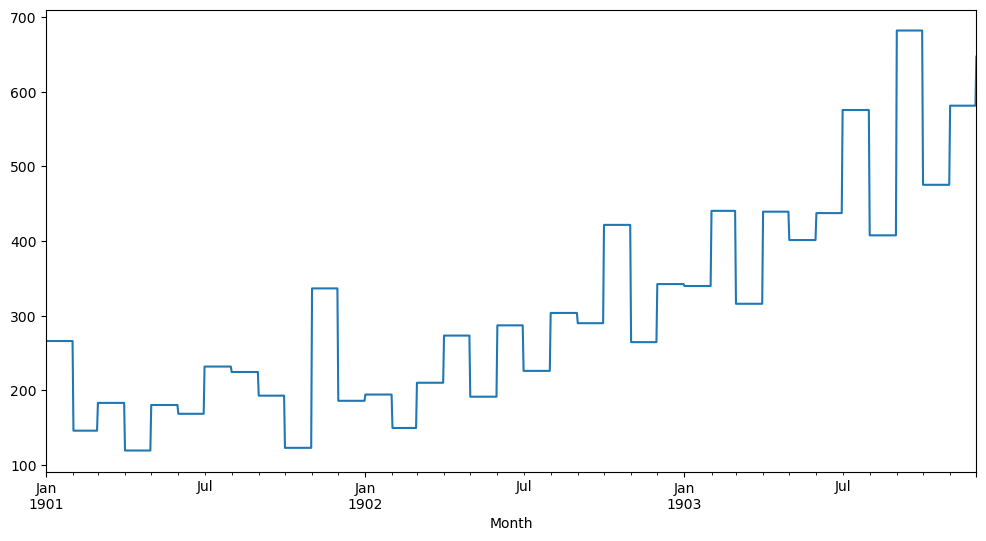

In [297]:

interpolated_zero = upsampled.interpolate(method='zero', order=5)
print(interpolated_zero.head(32))
interpolated_zero.plot()
plt.show()

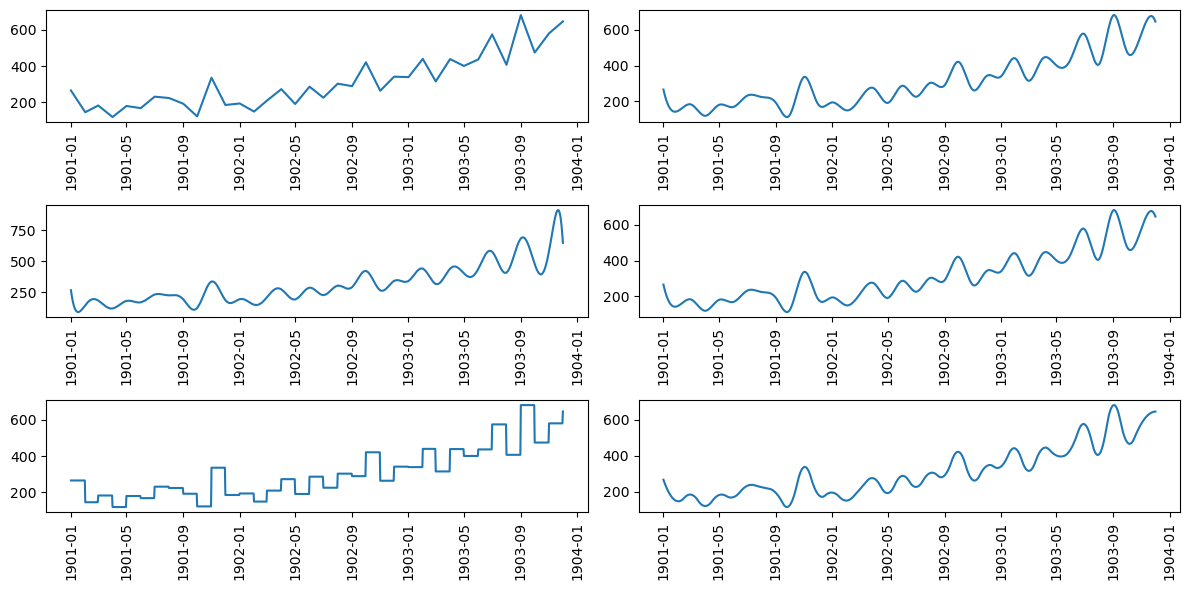

In [298]:
%matplotlib inline


fig, ax = plt.subplots(3, 2)


# Index 4 Axes arrays in 4 subplots within 1 Figure: 
ax[0, 0].plot( series ,label = "series"  ) #row=0, column=0
ax[1, 0].plot( interpolated_spline , label = "interpolated_spline" ) #row=1, column=0
ax[0, 1].plot( interpolated_polynomial , label = "interpolated_polynomial" )#row=0, column=1
ax[1, 1].plot( interpolated_cubic, label = "interpolated_cubic" ) #row=1, column=1
ax[2, 0].plot( interpolated_zero, label = "interpolated_zero"  ) #row=2, column=0
ax[2, 1].plot( interpolated_quadratic, label = "interpolated_quadratic" ) #row=2, column=1
# Rotating X-axis labels
plt.sca(ax[0, 0])
plt.xticks(rotation = 90)
plt.sca(ax[1, 0])
plt.xticks(rotation = 90)
plt.sca(ax[0, 1])
plt.xticks(rotation = 90)
plt.sca(ax[1, 1])
plt.xticks(rotation = 90)
plt.sca(ax[2, 0])
plt.xticks(rotation = 90)
plt.sca(ax[2, 1])
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show();


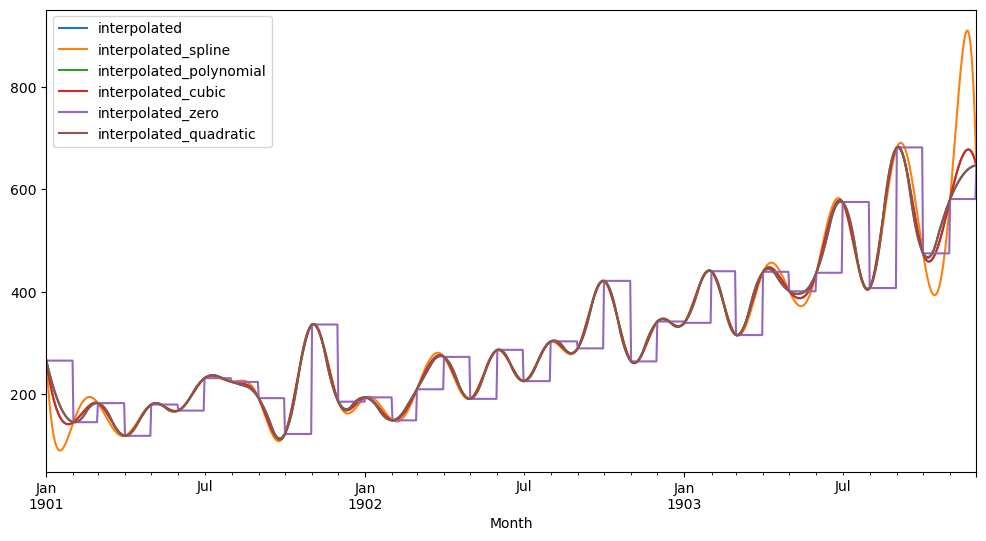

In [299]:
interpolated.plot( label = "interpolated")
interpolated_spline.plot(label = "interpolated_spline")
interpolated_polynomial.plot(label="interpolated_polynomial")
interpolated_cubic.plot(label="interpolated_cubic")
interpolated_zero.plot(label = "interpolated_zero")
interpolated_quadratic.plot(label = "interpolated_quadratic")
# plt.xticks(rotation = 90)
plt.legend()
plt.show();

## Downsampling Data

Month
1901-03-31    198.333333
1901-06-30    156.033333
1901-09-30    216.366667
1901-12-31    215.100000
1902-03-31    184.633333
Freq: Q-DEC, Name: Sales, dtype: float64


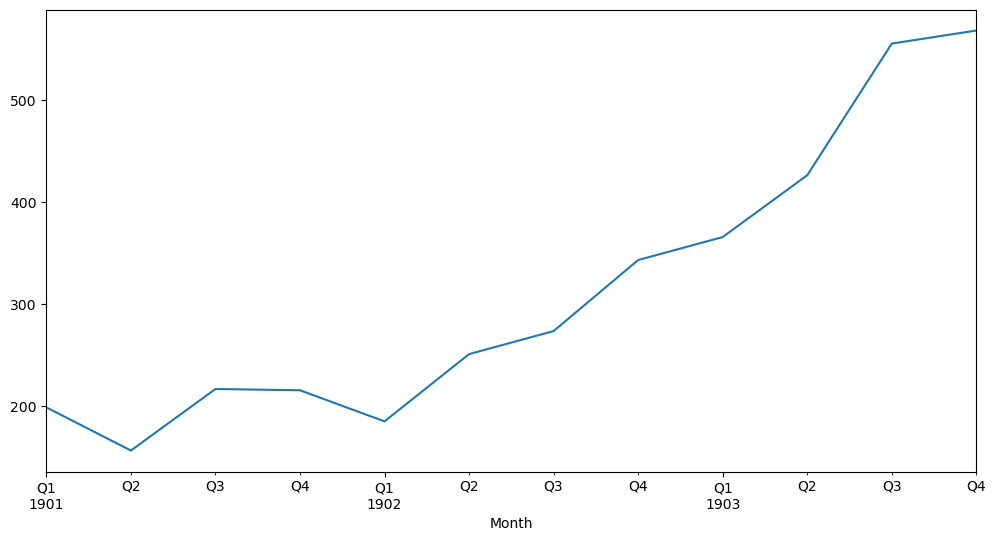

In [300]:
# downsample to quarterly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('./data/shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
resample = series.resample('Q')
quarterly_mean_sales = resample.mean()
print(quarterly_mean_sales.head())
quarterly_mean_sales.plot()
plt.show();

Month
1901-12-31    2357.5
1902-12-31    3153.5
1903-12-31    5742.6
Freq: A-DEC, Name: Sales, dtype: float64


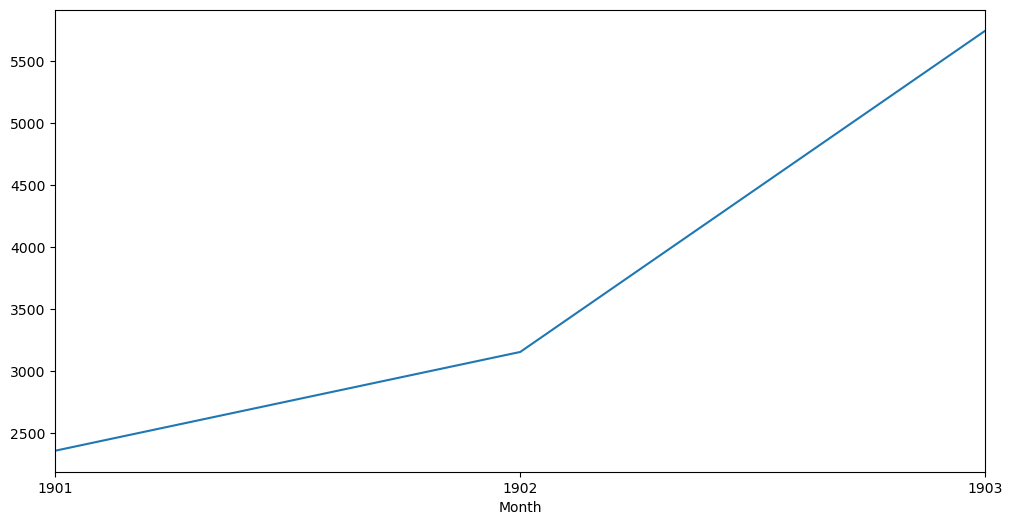

In [301]:
# downsample to yearly intervals
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

resample = series.resample('A')
yearly_mean_sales = resample.sum()
print(yearly_mean_sales.head())
yearly_mean_sales.plot()
plt.show();

# Power Transforms


Data transforms are intended to remove noise and improve the signal in time series forecasting. It can be very difficult to select a good, or even best, transform for a given prediction problem.

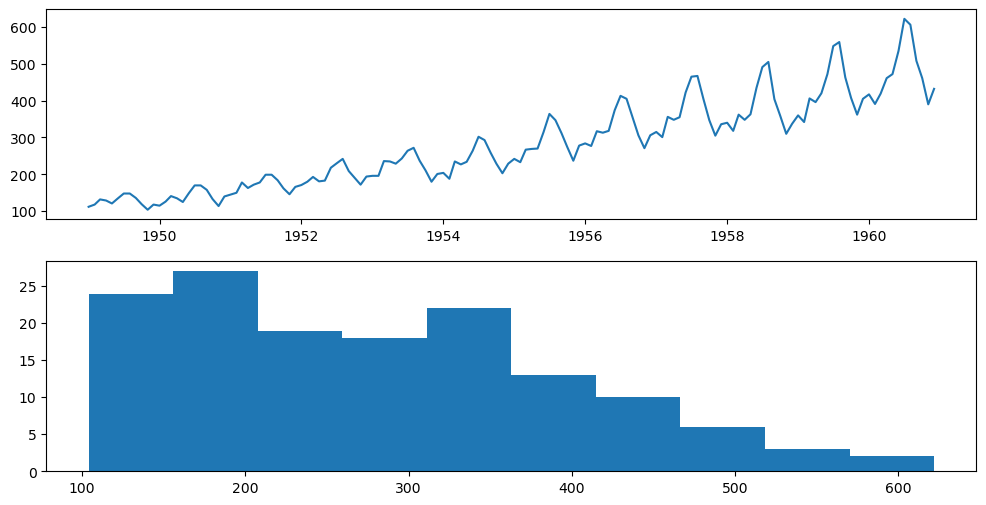

In [302]:
# load and plot a time series
from pandas import read_csv
import matplotlib.pyplot as plt
series = read_csv('./data/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
plt.figure(1)
# line plot
plt.subplot(211)
plt.plot(series)
# histogram
plt.subplot(212)
plt.hist(series)
plt.show();

The dataset is non-stationary, meaning that the mean and the variance of the observations change over time. This makes it difficult to model by both classical statistical methods, like ARIMA, and more sophisticated machine learning methods, like neural networks. This is caused by what appears to be both an increasing trend and a seasonality component.

In addition, the amount of change, or the variance, is increasing with time. This is clear when you look at the size of the seasonal component and notice that from one cycle to the next, the amplitude (from bottom to top of the cycle) is increasing. In this tutorial, we will investigate transforms that we can use on time series datasets that exhibit this property.

## Square Root Transform
A time series that has a quadratic growth trend can be made linear by taking the square root. Let’s demonstrate this with a quick contrived example. Consider a series of the numbers 1 to 99 squared. The line plot of this series will show a quadratic growth trend and a histogram of the values will show an exponential distribution with a long tail. The snippet of code below creates and graphs this series.

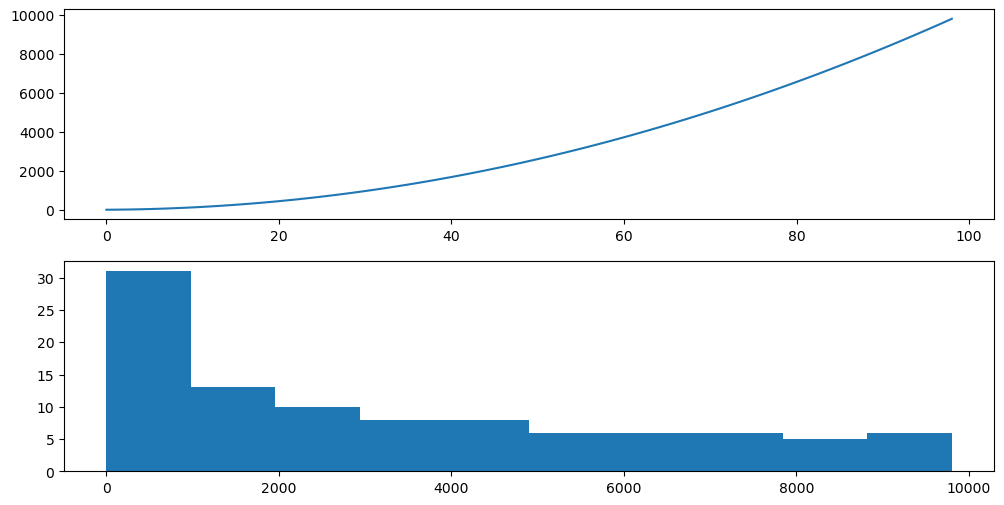

In [303]:
# contrive a quadratic time series
from matplotlib import pyplot
series = [i**2 for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show();

## Square root transform a contrived quadratic time series


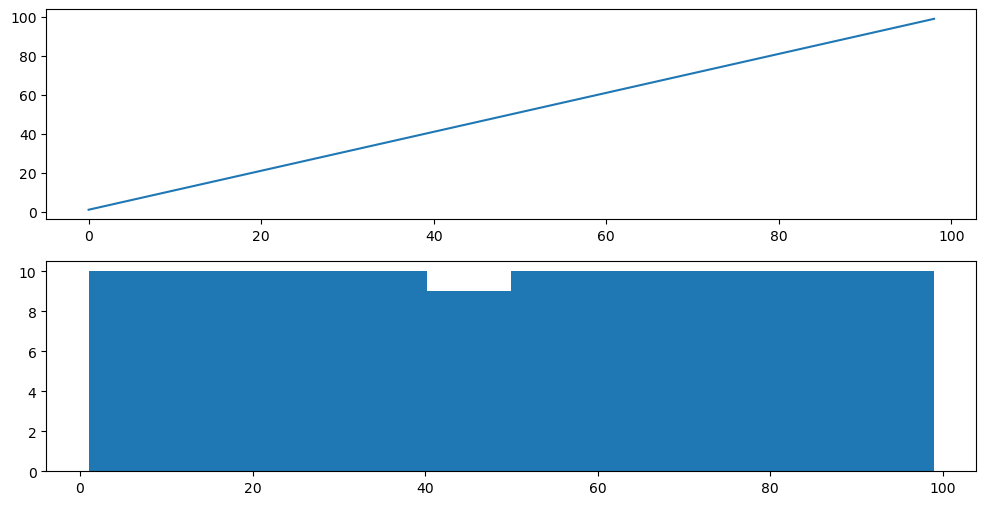

In [304]:
# square root transform a contrived quadratic time series
from matplotlib import pyplot
from numpy import sqrt
series = [i**2 for i in range(1,100)]
# sqrt transform
transform = series = sqrt(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show();

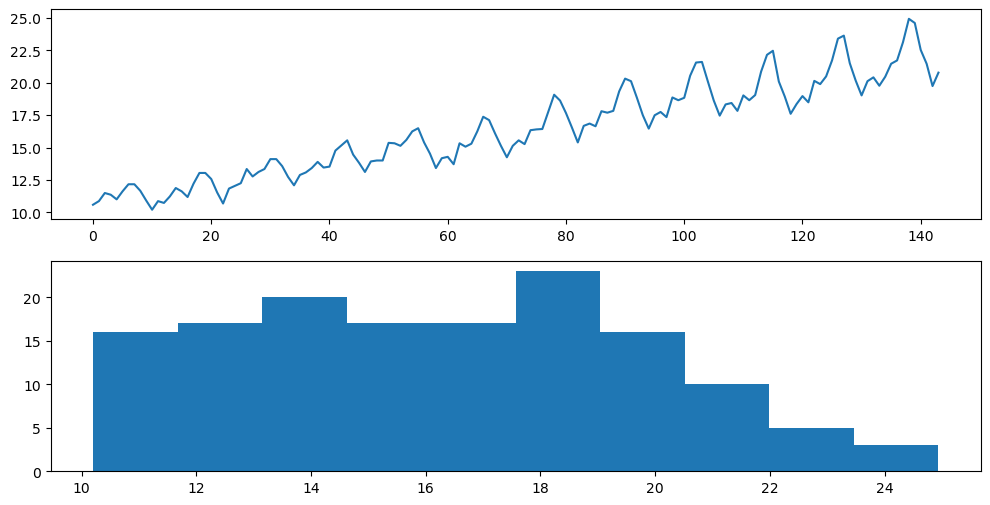

In [305]:
# square root transform a time series
from pandas import read_csv
from pandas import DataFrame
from numpy import sqrt
from matplotlib import pyplot
series = read_csv('./data/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)

dataframe.columns = ['passengers']

dataframe['passengers_sqrt'] = sqrt(dataframe['passengers'])

plt.figure(1)
# line plot
plt.subplot(211)
dataframe['passengers_sqrt'].plot(label ='passengers_sqrt')
# dataframe['passengers'].plot(label ='passengers')

# histogram
plt.subplot(212)
plt.hist(dataframe['passengers_sqrt'])
plt.show();

In [306]:
dataframe

,passengers,passengers_sqrt
0,112,10.583005
1,118,10.862780
2,132,11.489125
3,129,11.357817
4,121,11.000000
...,...,...
139,606,24.617067
140,508,22.538855
141,461,21.470911
142,390,19.748418


## Log Transform
A class of more extreme trends are exponential, often graphed as a hockey stick. Time series with an exponential distribution can be made linear by taking the logarithm of the values. This is called a log transform. As with the square and square root case above, we can demonstrate this with a quick example. 

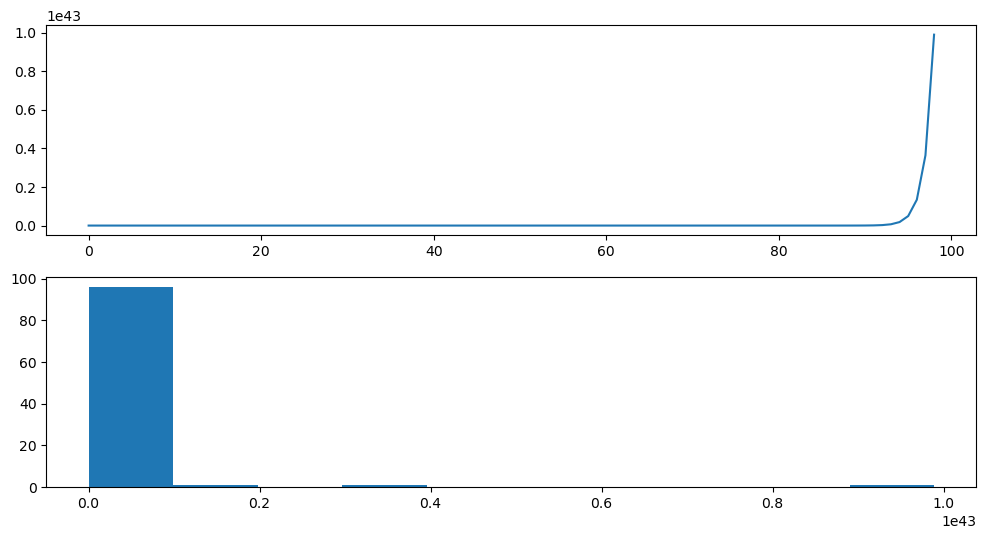

In [307]:
# create and plot an exponential time series
from matplotlib import pyplot
from math import exp
series = [exp(i) for i in range(1,100)]
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(series)
# histogram
pyplot.subplot(212)
pyplot.hist(series)
pyplot.show();

Again, we can transform this series back to linear by taking the natural logarithm of the values. This would make the series linear and the distribution uniform.

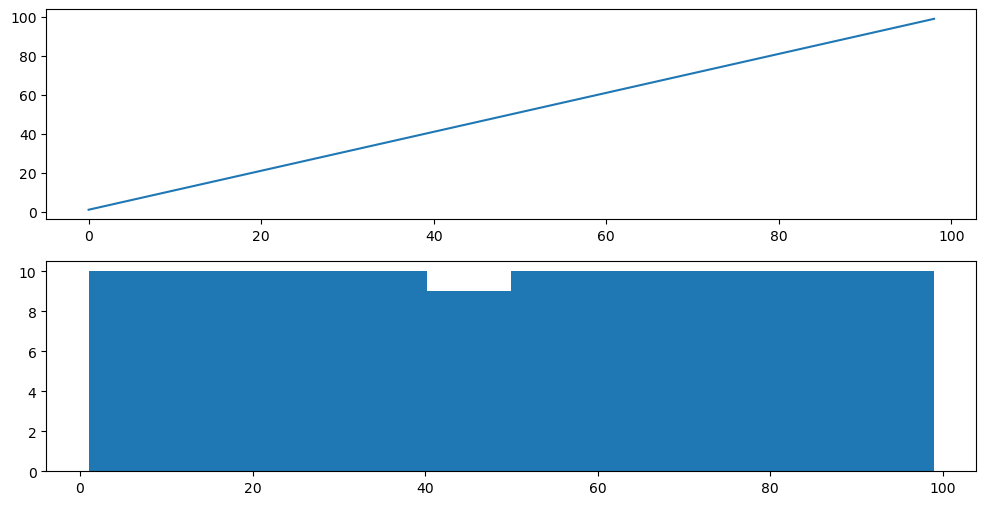

In [308]:
# log transform a contrived exponential time series
from matplotlib import pyplot
from math import exp
from numpy import log
series = [exp(i) for i in range(1,100)]
transform = log(series)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(transform)
# histogram
pyplot.subplot(212)
pyplot.hist(transform)
pyplot.show();

## log transform a time series


   passengers  passengers_lag
0         112        4.718499
1         118        4.770685
2         132        4.882802
3         129        4.859812
4         121        4.795791


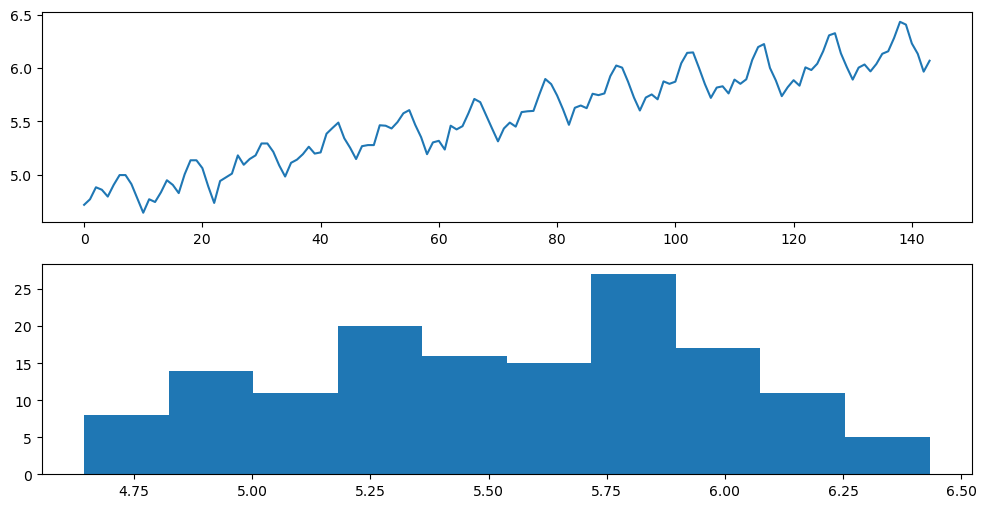

In [309]:
from pandas import read_csv
from pandas import DataFrame
from numpy import log
from matplotlib import pyplot
series = read_csv('./data/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers_lag'] = log(dataframe['passengers'])
print(dataframe.head(5))

pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers_lag'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers_lag'])
pyplot.show();


Log transforms are popular with time series data as they are effective at removing exponential variance. It is important to note that this operation assumes values are positive and non-zero. It is common to transform observations by adding a fixed constant to ensure all input values meet this requirement. For example:

$$transform = log(constant + x)$$

Where $log$ is the **natural logarithm**, $transform$ is the **transformed series**, $constant$ is a **fixed value** that lifts all observations above zero, and $x$ is the **time series**.

## Box-Cox Transform
The square root transform and log transform belong to a class of transforms called power transforms. The Box-Cox transform is a configurable data transform method that supports both square root and log transform, as well as a suite of related transforms.

More than that, it can be configured to evaluate a suite of transforms automatically and select a best fit. It can be thought of as a power tool to iron out power-based change in your time series. The resulting series may be more linear and the resulting distribution more Gaussian or Uniform, depending on the underlying process that generated it. The scipy.stats library provides an implementation of the Box-Cox transform. The boxcox() function3 takes an argument, called lambda, that controls the type of transform to perform. Below are some common values for lambda:
- lambda = -1.0 is a reciprocal transform.
- lambda = -0.5 is a reciprocal square root transform. 
- lambda = 0.0 is a log transform.
- lambda = 0.5 is a square root transform.
- lambda = 1.0 is no transform.


In [310]:
# manually box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('./data/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers_lmda_1_0'] = boxcox(dataframe['passengers'], lmbda=-1.0)
dataframe['passengers_lmda_0_5'] = boxcox(dataframe['passengers'], lmbda=-0.5)
dataframe['passengers_lmda_0_0'] = boxcox(dataframe['passengers'], lmbda=0.0)
dataframe['passengers_lmda_5_0'] = boxcox(dataframe['passengers'], lmbda=0.5)
dataframe['passengers_lmda_1_0_0'] = boxcox(dataframe['passengers'], lmbda=1.0)
dataframe['passengers_lamda_none'], lam = boxcox(dataframe['passengers'])

dataframe.head(5)

,passengers,passengers_lmda_1_0,passengers_lmda_0_5,passengers_lmda_0_0,passengers_lmda_5_0,passengers_lmda_1_0_0,passengers_lamda_none
0,112,0.991071,1.811018,4.718499,19.166010,111.0,6.827490
1,118,0.991525,1.815885,4.770685,19.725561,117.0,6.932822
2,132,0.992424,1.825922,4.882802,20.978251,131.0,7.161892
3,129,0.992248,1.823910,4.859812,20.715633,128.0,7.114611
4,121,0.991736,1.818182,4.795791,20.000000,120.0,6.983787


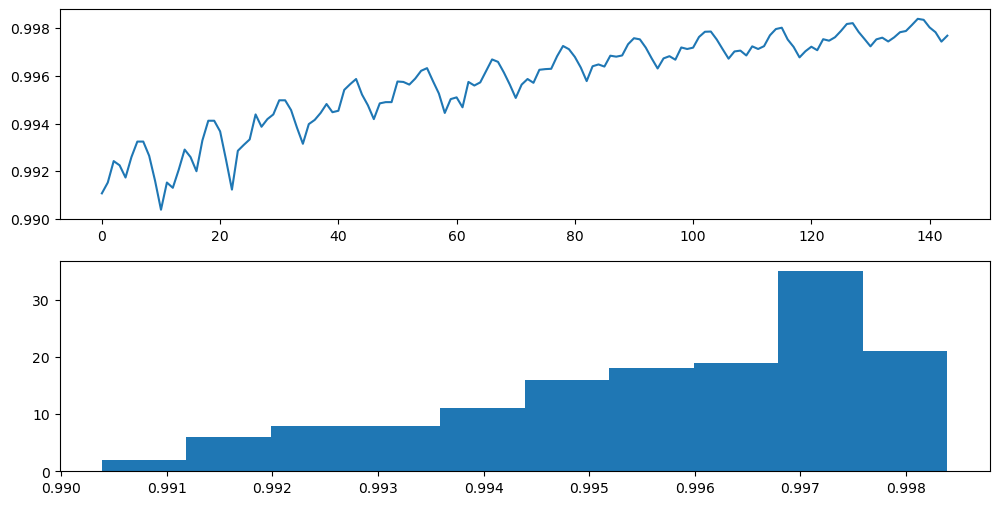

In [311]:
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers_lmda_1_0'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers_lmda_1_0'])
pyplot.show();

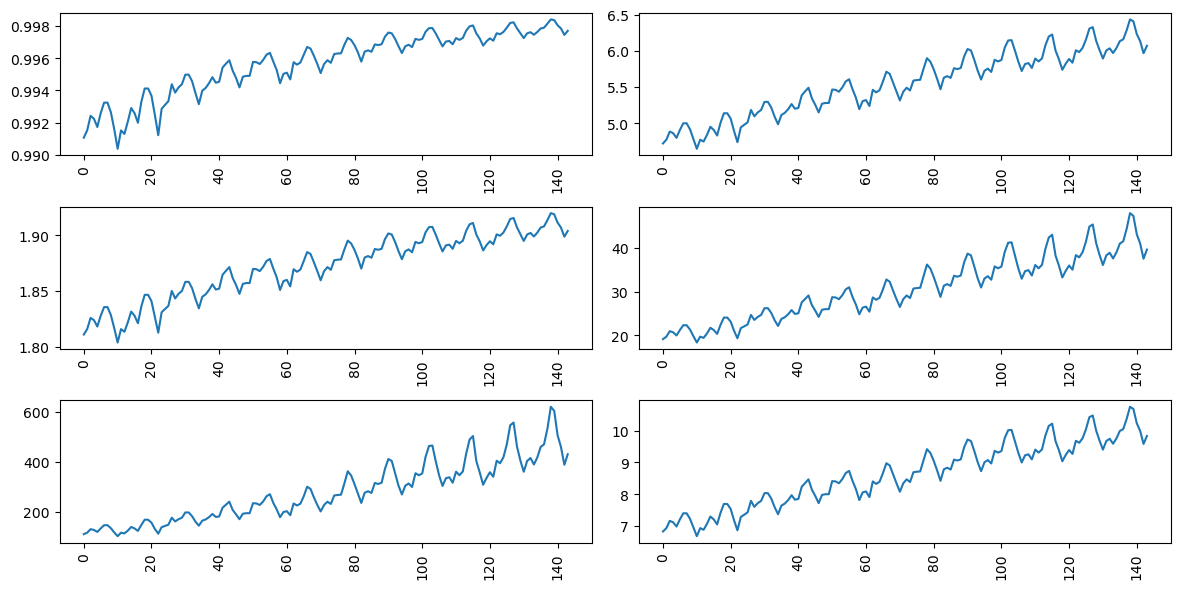

In [312]:
%matplotlib inline


fig, ax = plt.subplots(3, 2)


# Index 4 Axes arrays in 4 subplots within 1 Figure: 
ax[0, 0].plot( dataframe['passengers_lmda_1_0'] ,label = "passengers lmda -1.0"  ) #row=0, column=0
ax[1, 0].plot( dataframe['passengers_lmda_0_5'] , label = "passengers lmda -0.5" ) #row=1, column=0
ax[0, 1].plot( dataframe['passengers_lmda_0_0'] , label = "passengers lmda 0.0" )#row=0, column=1
ax[1, 1].plot( dataframe['passengers_lmda_5_0'], label = "passengers lmda 0.5" ) #row=1, column=1
ax[2, 0].plot( dataframe['passengers_lmda_1_0_0'], label = "passengers lmda 1.0"  ) #row=2, column=0
ax[2, 1].plot( dataframe['passengers_lamda_none'], label = "passengers lmda None" ) #row=2, column=1
# Rotating X-axis labels
plt.sca(ax[0, 0])
plt.xticks(rotation = 90)
plt.sca(ax[1, 0])
plt.xticks(rotation = 90)
plt.sca(ax[0, 1])
plt.xticks(rotation = 90)
plt.sca(ax[1, 1])
plt.xticks(rotation = 90)
plt.sca(ax[2, 0])
plt.xticks(rotation = 90)
plt.sca(ax[2, 1])
plt.xticks(rotation = 90)
fig.tight_layout()
plt.show();


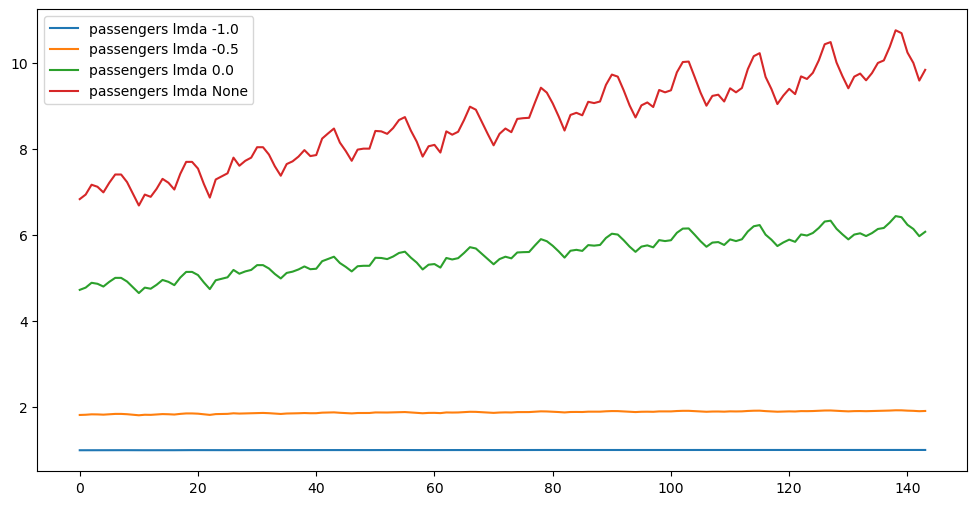

In [313]:
dataframe['passengers_lmda_1_0'].plot( label = "passengers lmda -1.0"  ) 
dataframe['passengers_lmda_0_5'].plot(  label = "passengers lmda -0.5" ) 
dataframe['passengers_lmda_0_0'].plot(  label = "passengers lmda 0.0" )
# dataframe['passengers_lmda_5_0'].plot(  label = "passengers lmda 0.5" ) 
# dataframe['passengers_lmda_1_0_0'].plot(  label = "passengers lmda 1.0"  ) 
dataframe['passengers_lamda_none'].plot(  label = "passengers lmda None"  ) 

# plt.xticks(rotation = 90)
plt.legend()
plt.show();

We can set the lambda parameter to None (the default) and let the function find a statistically tuned value. 

Lambda: 0.148023


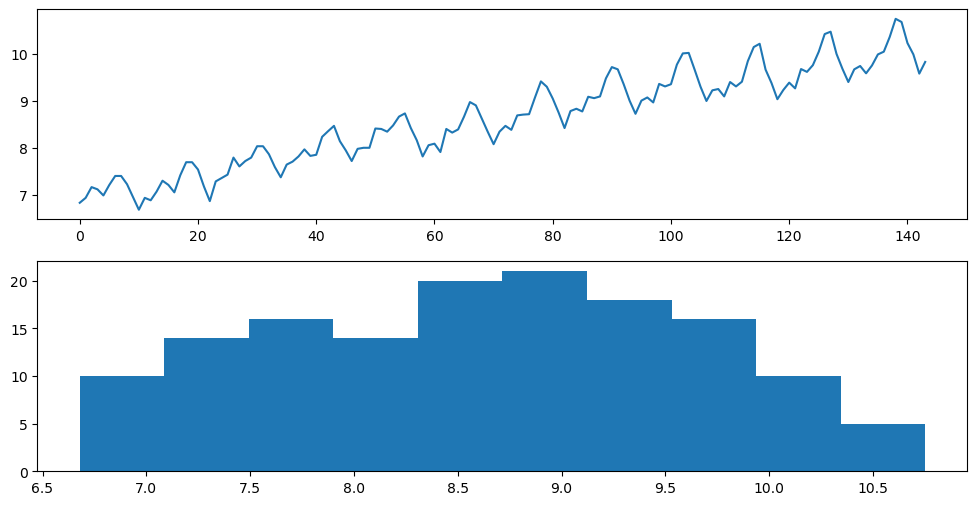

In [314]:
# automatically box-cox transform a time series
from pandas import read_csv
from pandas import DataFrame
from scipy.stats import boxcox
from matplotlib import pyplot
series = read_csv('./data/airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
dataframe = DataFrame(series.values)
dataframe.columns = ['passengers']
dataframe['passengers_lamda_none'], lam = boxcox(dataframe['passengers'])
print('Lambda: %f' % lam)
pyplot.figure(1)
# line plot
pyplot.subplot(211)
pyplot.plot(dataframe['passengers_lamda_none'])
# histogram
pyplot.subplot(212)
pyplot.hist(dataframe['passengers_lamda_none'])
pyplot.show();

# Moving Average Smoothing

Moving average smoothing is a naive and effective technique in time series forecasting. It can be used for data preparation, feature engineering, and even directly for making predictions. In this tutorial, you will discover how to use moving average smoothing for time series forecasting with Python.

Smoothing is a technique applied to time series to remove the fine-grained variation between time steps. The hope of smoothing is to remove noise and better expose the signal of the underlying causal processes. Moving averages are a simple and common type of smoothing used in time series analysis and time series forecasting. Calculating a moving average involves creating a new series where the values are comprised of the average of raw observations in the original time series.

A moving average requires that you specify a window size called the window width. This defines the number of raw observations used to calculate the moving average value. The moving part in the moving average refers to the fact that the window defined by the window width is slid along the time series to calculate the average values in the new series. There are two main types of moving average that are used: Centered and Trailing Moving Average.



Centered Moving Average
The value at time (t) is calculated as the average of raw observations at, before, and after time (t). For example, a center moving average with a window of 3 would be calculated as:

$$center ma(t) = mean(obs(t − 1), obs(t), obs(t + 1))$$

This method requires knowledge of future values, and as such is used on time series analysis to better understand the dataset. A center moving average can be used as a general method to remove trend and seasonal components from a time series, a method that we often cannot use when forecasting

## Trailing Moving Average
The value at time (t) is calculated as the average of the raw observations at and before the time (t). For example, a trailing moving average with a window of 3 would be calculated as:

$$trail ma(t) = mean(obs(t − 2), obs(t − 1), obs(t))$$

Trailing moving average only uses historical observations and is used on time series forecasting.
It is the type of moving average that we will focus on in this tutorial.

Date
1959-01-01          NaN
1959-01-02          NaN
1959-01-03    32.333333
1959-01-04    31.000000
1959-01-05    35.000000
1959-01-06    34.666667
1959-01-07    39.333333
1959-01-08    39.000000
1959-01-09    42.000000
1959-01-10    36.000000
Name: Births, dtype: float64


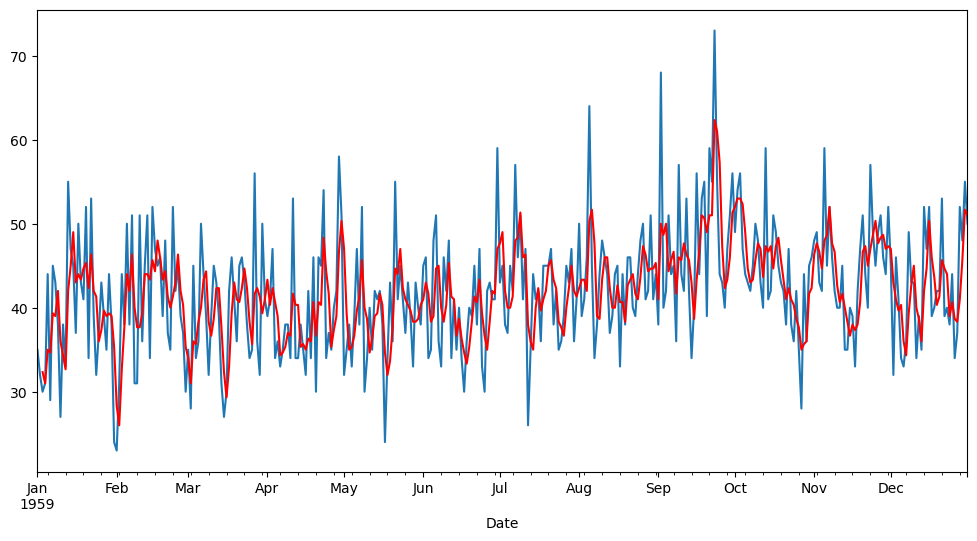

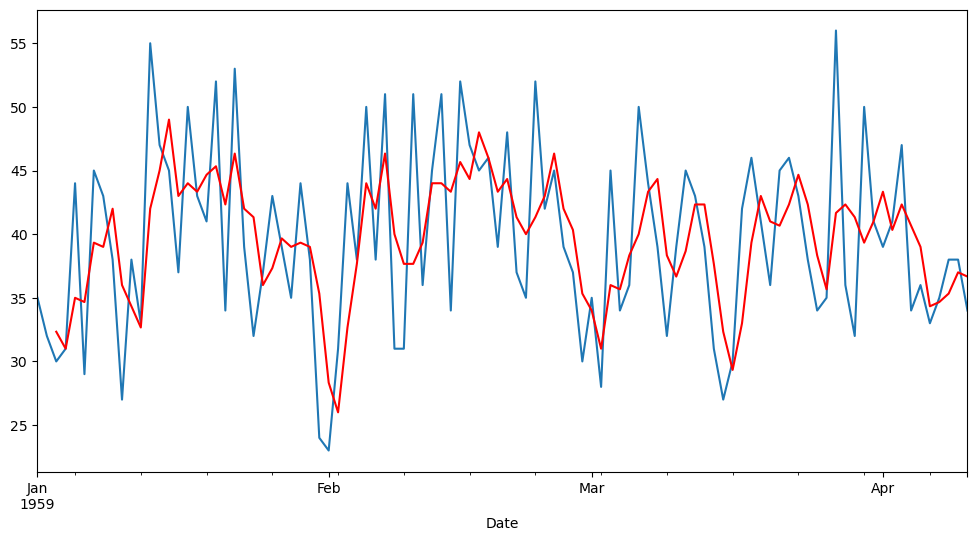

In [316]:
# moving average smoothing as data preparation
from pandas import read_csv
from matplotlib import pyplot
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# tail-rolling average transform
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))
# plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# zoomed plot original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show();

Line plot of the first 100 observations from the Daily Female Births dataset (blue) with a moving average (red).

## Moving Average as Feature Engineering
The moving average can be used as a source of new information when modeling a time series forecast as a supervised learning problem. In this case, the moving average is calculated and added as a new input feature used to predict the next time step. 
- First, a copy of the series must be shifted forward by one time step. This will represent the input to our prediction problem, or a lag=1 version of the series. 


In [317]:
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
means = window.mean()
dataframe = concat([means, lag1, df], axis=1)
dataframe.columns = ['mean', 't', 't+1']
print(dataframe.head(10))

        mean     t  t+1
0        NaN   NaN   35
1        NaN  35.0   32
2        NaN  32.0   30
3        NaN  30.0   31
4  32.333333  31.0   44
5  31.000000  44.0   29
6  35.000000  29.0   45
7  34.666667  45.0   43
8  39.333333  43.0   38
9  39.000000  38.0   27


- Next, a second copy of the series needs to be shifted forward by one, minus the window size. This is to ensure that the moving average summarizes the last few values and does not include the value to be predicted in the average, which would be an invalid framing of the problem as the input would contain knowledge of the future being predicted.

## Moving Average as Prediction
The moving average value can also be used directly to make predictions. It is a naive model and assumes that the trend and seasonality components of the time series have already been removed or adjusted for. The moving average model for predictions can easily be used in a walk-forward manner. As new observations are made available (e.g. daily), the model can be updated and a prediction made for the next day. 

predicted=32.333333, expected=31.000000
predicted=31.000000, expected=44.000000
predicted=35.000000, expected=29.000000
predicted=34.666667, expected=45.000000
predicted=39.333333, expected=43.000000
predicted=39.000000, expected=38.000000
predicted=42.000000, expected=27.000000
predicted=36.000000, expected=38.000000
predicted=34.333333, expected=33.000000
predicted=32.666667, expected=55.000000
predicted=42.000000, expected=47.000000
predicted=45.000000, expected=45.000000
predicted=49.000000, expected=37.000000
predicted=43.000000, expected=50.000000
predicted=44.000000, expected=43.000000
predicted=43.333333, expected=41.000000
predicted=44.666667, expected=52.000000
predicted=45.333333, expected=34.000000
predicted=42.333333, expected=53.000000
predicted=46.333333, expected=39.000000
predicted=42.000000, expected=32.000000
predicted=41.333333, expected=37.000000
predicted=36.000000, expected=43.000000
predicted=37.333333, expected=39.000000
predicted=39.666667, expected=35.000000


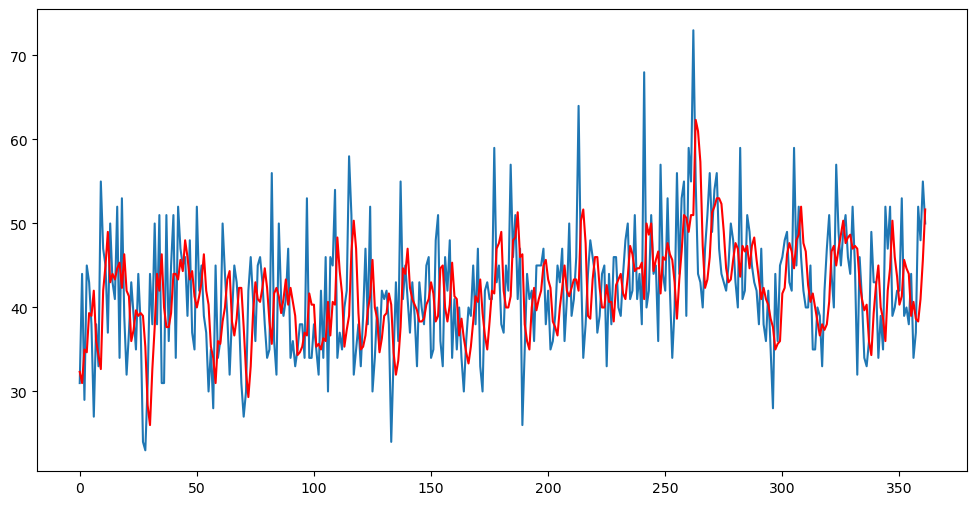

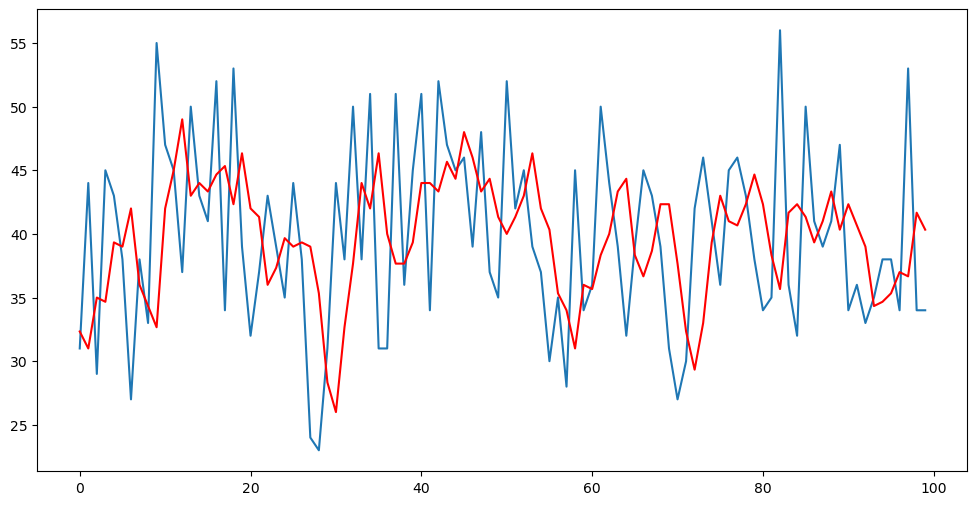

In [319]:
# moving average smoothing as a forecast model
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
series = read_csv('./data/daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()
# walk forward over time steps in test
for t in range(len(test)):
	length = len(history)
	yhat = mean([history[i] for i in range(length-window,length)])
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()
# zoom plot
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show();